In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import warnings
import talib
import json
import time

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
patternList = [talib.CDL2CROWS, talib.CDL3BLACKCROWS, talib.CDL3INSIDE, talib.CDL3LINESTRIKE, talib.CDL3OUTSIDE, talib.CDL3STARSINSOUTH, talib.CDL3WHITESOLDIERS, talib.CDLABANDONEDBABY, talib.CDLADVANCEBLOCK, talib.CDLBELTHOLD, talib.CDLBREAKAWAY, talib.CDLCLOSINGMARUBOZU, talib.CDLCONCEALBABYSWALL, talib.CDLCOUNTERATTACK, talib.CDLDARKCLOUDCOVER, talib.CDLDOJI, talib.CDLDOJISTAR, talib.CDLDRAGONFLYDOJI, talib.CDLENGULFING, talib.CDLEVENINGDOJISTAR, talib.CDLEVENINGSTAR, talib.CDLGAPSIDESIDEWHITE, talib.CDLGRAVESTONEDOJI, talib.CDLHAMMER, talib.CDLHANGINGMAN, talib.CDLHARAMI, talib.CDLHARAMICROSS, talib.CDLHIGHWAVE, talib.CDLHIKKAKE, talib.CDLHIKKAKEMOD, talib.CDLHOMINGPIGEON, talib.CDLIDENTICAL3CROWS, talib.CDLINNECK, talib.CDLINVERTEDHAMMER, talib.CDLKICKING, talib.CDLKICKINGBYLENGTH, talib.CDLLADDERBOTTOM, talib.CDLLONGLEGGEDDOJI, talib.CDLLONGLINE, talib.CDLMARUBOZU, talib.CDLMATCHINGLOW, talib.CDLMATHOLD, talib.CDLMORNINGDOJISTAR, talib.CDLMORNINGSTAR, talib.CDLONNECK, talib.CDLPIERCING, talib.CDLRICKSHAWMAN, talib.CDLRISEFALL3METHODS, talib.CDLSEPARATINGLINES, talib.CDLSHOOTINGSTAR, talib.CDLSHORTLINE, talib.CDLSPINNINGTOP, talib.CDLSTALLEDPATTERN, talib.CDLSTICKSANDWICH, talib.CDLTAKURI, talib.CDLTASUKIGAP, talib.CDLTHRUSTING, talib.CDLTRISTAR, talib.CDLUNIQUE3RIVER, talib.CDLUPSIDEGAP2CROWS, talib.CDLXSIDEGAP3METHODS]

In [4]:
dictOfPatterns = {i: list() for i in patternList}

In [5]:
header = {
          "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0",
          "X-Requested-With": "XMLHttpRequest"
        }

In [6]:
nifty500TickerList = list(pd.read_csv('https://www1.nseindia.com/content/indices/ind_nifty500list.csv')['Symbol'])

In [7]:
%%time
totalNoOfDays = 0
for ticker in nifty500TickerList:
    try:
        currentSymbol = (ticker + '.NS')
        period1 = int(time.time() - 1633974477) #eternity
        period2 = int(time.time())
        url = f'https://query2.finance.yahoo.com/v8/finance/chart/{currentSymbol}?formatted=true&crumb=LqSYCwMewDq&lang=en-US&region=US&includeAdjustedClose=true&interval=1d&period1={period1}&period2={period2}&events=capitalGain|div|split&useYfid=true&corsDomain=finance.yahoo.com'
        r = requests.get(url, headers=header)
        soup = json.loads(str(BeautifulSoup(r.text, 'html.parser')))

        timestamp = soup['chart']['result'][0]['timestamp'][-252:]
        openList = soup['chart']['result'][0]['indicators']['quote'][0]['open'][-252:]
        highList = soup['chart']['result'][0]['indicators']['quote'][0]['high'][-252:]
        lowList = soup['chart']['result'][0]['indicators']['quote'][0]['low'][-252:]
        closeList = soup['chart']['result'][0]['indicators']['quote'][0]['close'][-252:]

        timestamp = [i for i in timestamp if i != None]
        openList = [i for i in openList if i != None]
        highList = [i for i in highList if i != None]
        lowList = [i for i in lowList if i != None]
        closeList = [i for i in closeList if i != None]

        dataframe = pd.DataFrame(list(zip(timestamp, openList, highList, lowList, closeList)), columns=['timestamp', 'open', 'high', 'low', 'close'])
        totalNoOfDays = totalNoOfDays + len(dataframe)

        for pattern in patternList:
            dataframe['pattern'] = pattern(dataframe.open, dataframe.high, dataframe.low, dataframe.close)
            dataframe['shiftedReturn'] = np.log(dataframe['close'].shift(-1)/dataframe['close'])*100
            dataframe['realizedReturn'] = np.where(dataframe['pattern'] == -100, dataframe['shiftedReturn']*-1, dataframe['shiftedReturn'])
            dataframe.dropna(inplace=True)
            print(str(pattern)[10:-23],'for',ticker)
            dictOfPatterns[pattern] = dictOfPatterns[pattern] + list(dataframe[dataframe['pattern'] == 100]['realizedReturn'])
    except:
        pass

CDL2CROWS for 3MINDIA
CDL3BLACKCROWS for 3MINDIA
CDL3INSIDE for 3MINDIA
CDL3LINESTRIKE for 3MINDIA
CDL3OUTSIDE for 3MINDIA
CDL3STARSINSOUTH for 3MINDIA
CDL3WHITESOLDIERS for 3MINDIA
CDLABANDONEDBABY for 3MINDIA
CDLADVANCEBLOCK for 3MINDIA
CDLBELTHOLD for 3MINDIA
CDLBREAKAWAY for 3MINDIA
CDLCLOSINGMARUBOZU for 3MINDIA
CDLCONCEALBABYSWALL for 3MINDIA
CDLCOUNTERATTACK for 3MINDIA
CDLDARKCLOUDCOVER for 3MINDIA
CDLDOJI for 3MINDIA
CDLDOJISTAR for 3MINDIA
CDLDRAGONFLYDOJI for 3MINDIA
CDLENGULFING for 3MINDIA
CDLEVENINGDOJISTAR for 3MINDIA
CDLEVENINGSTAR for 3MINDIA
CDLGAPSIDESIDEWHITE for 3MINDIA
CDLGRAVESTONEDOJI for 3MINDIA
CDLHAMMER for 3MINDIA
CDLHANGINGMAN for 3MINDIA
CDLHARAMI for 3MINDIA
CDLHARAMICROSS for 3MINDIA
CDLHIGHWAVE for 3MINDIA
CDLHIKKAKE for 3MINDIA
CDLHIKKAKEMOD for 3MINDIA
CDLHOMINGPIGEON for 3MINDIA
CDLIDENTICAL3CROWS for 3MINDIA
CDLINNECK for 3MINDIA
CDLINVERTEDHAMMER for 3MINDIA
CDLKICKING for 3MINDIA
CDLKICKINGBYLENGTH for 3MINDIA
CDLLADDERBOTTOM for 3MINDIA
CDLLONGLE

CDLINVERTEDHAMMER for APLAPOLLO
CDLKICKING for APLAPOLLO
CDLKICKINGBYLENGTH for APLAPOLLO
CDLLADDERBOTTOM for APLAPOLLO
CDLLONGLEGGEDDOJI for APLAPOLLO
CDLLONGLINE for APLAPOLLO
CDLMARUBOZU for APLAPOLLO
CDLMATCHINGLOW for APLAPOLLO
CDLMATHOLD for APLAPOLLO
CDLMORNINGDOJISTAR for APLAPOLLO
CDLMORNINGSTAR for APLAPOLLO
CDLONNECK for APLAPOLLO
CDLPIERCING for APLAPOLLO
CDLRICKSHAWMAN for APLAPOLLO
CDLRISEFALL3METHODS for APLAPOLLO
CDLSEPARATINGLINES for APLAPOLLO
CDLSHOOTINGSTAR for APLAPOLLO
CDLSHORTLINE for APLAPOLLO
CDLSPINNINGTOP for APLAPOLLO
CDLSTALLEDPATTERN for APLAPOLLO
CDLSTICKSANDWICH for APLAPOLLO
CDLTAKURI for APLAPOLLO
CDLTASUKIGAP for APLAPOLLO
CDLTHRUSTING for APLAPOLLO
CDLTRISTAR for APLAPOLLO
CDLUNIQUE3RIVER for APLAPOLLO
CDLUPSIDEGAP2CROWS for APLAPOLLO
CDLXSIDEGAP3METHODS for APLAPOLLO
CDL2CROWS for AUBANK
CDL3BLACKCROWS for AUBANK
CDL3INSIDE for AUBANK
CDL3LINESTRIKE for AUBANK
CDL3OUTSIDE for AUBANK
CDL3STARSINSOUTH for AUBANK
CDL3WHITESOLDIERS for AUBANK
CDLABANDON

CDLINNECK for ABBOTINDIA
CDLINVERTEDHAMMER for ABBOTINDIA
CDLKICKING for ABBOTINDIA
CDLKICKINGBYLENGTH for ABBOTINDIA
CDLLADDERBOTTOM for ABBOTINDIA
CDLLONGLEGGEDDOJI for ABBOTINDIA
CDLLONGLINE for ABBOTINDIA
CDLMARUBOZU for ABBOTINDIA
CDLMATCHINGLOW for ABBOTINDIA
CDLMATHOLD for ABBOTINDIA
CDLMORNINGDOJISTAR for ABBOTINDIA
CDLMORNINGSTAR for ABBOTINDIA
CDLONNECK for ABBOTINDIA
CDLPIERCING for ABBOTINDIA
CDLRICKSHAWMAN for ABBOTINDIA
CDLRISEFALL3METHODS for ABBOTINDIA
CDLSEPARATINGLINES for ABBOTINDIA
CDLSHOOTINGSTAR for ABBOTINDIA
CDLSHORTLINE for ABBOTINDIA
CDLSPINNINGTOP for ABBOTINDIA
CDLSTALLEDPATTERN for ABBOTINDIA
CDLSTICKSANDWICH for ABBOTINDIA
CDLTAKURI for ABBOTINDIA
CDLTASUKIGAP for ABBOTINDIA
CDLTHRUSTING for ABBOTINDIA
CDLTRISTAR for ABBOTINDIA
CDLUNIQUE3RIVER for ABBOTINDIA
CDLUPSIDEGAP2CROWS for ABBOTINDIA
CDLXSIDEGAP3METHODS for ABBOTINDIA
CDL2CROWS for ADANIENT
CDL3BLACKCROWS for ADANIENT
CDL3INSIDE for ADANIENT
CDL3LINESTRIKE for ADANIENT
CDL3OUTSIDE for ADANIENT
CDL3

CDLHIKKAKEMOD for ADANITRANS
CDLHOMINGPIGEON for ADANITRANS
CDLIDENTICAL3CROWS for ADANITRANS
CDLINNECK for ADANITRANS
CDLINVERTEDHAMMER for ADANITRANS
CDLKICKING for ADANITRANS
CDLKICKINGBYLENGTH for ADANITRANS
CDLLADDERBOTTOM for ADANITRANS
CDLLONGLEGGEDDOJI for ADANITRANS
CDLLONGLINE for ADANITRANS
CDLMARUBOZU for ADANITRANS
CDLMATCHINGLOW for ADANITRANS
CDLMATHOLD for ADANITRANS
CDLMORNINGDOJISTAR for ADANITRANS
CDLMORNINGSTAR for ADANITRANS
CDLONNECK for ADANITRANS
CDLPIERCING for ADANITRANS
CDLRICKSHAWMAN for ADANITRANS
CDLRISEFALL3METHODS for ADANITRANS
CDLSEPARATINGLINES for ADANITRANS
CDLSHOOTINGSTAR for ADANITRANS
CDLSHORTLINE for ADANITRANS
CDLSPINNINGTOP for ADANITRANS
CDLSTALLEDPATTERN for ADANITRANS
CDLSTICKSANDWICH for ADANITRANS
CDLTAKURI for ADANITRANS
CDLTASUKIGAP for ADANITRANS
CDLTHRUSTING for ADANITRANS
CDLTRISTAR for ADANITRANS
CDLUNIQUE3RIVER for ADANITRANS
CDLUPSIDEGAP2CROWS for ADANITRANS
CDLXSIDEGAP3METHODS for ADANITRANS
CDL2CROWS for ABCAPITAL
CDL3BLACKCROWS

CDLHOMINGPIGEON for AFFLE
CDLIDENTICAL3CROWS for AFFLE
CDLINNECK for AFFLE
CDLINVERTEDHAMMER for AFFLE
CDLKICKING for AFFLE
CDLKICKINGBYLENGTH for AFFLE
CDLLADDERBOTTOM for AFFLE
CDLLONGLEGGEDDOJI for AFFLE
CDLLONGLINE for AFFLE
CDLMARUBOZU for AFFLE
CDLMATCHINGLOW for AFFLE
CDLMATHOLD for AFFLE
CDLMORNINGDOJISTAR for AFFLE
CDLMORNINGSTAR for AFFLE
CDLONNECK for AFFLE
CDLPIERCING for AFFLE
CDLRICKSHAWMAN for AFFLE
CDLRISEFALL3METHODS for AFFLE
CDLSEPARATINGLINES for AFFLE
CDLSHOOTINGSTAR for AFFLE
CDLSHORTLINE for AFFLE
CDLSPINNINGTOP for AFFLE
CDLSTALLEDPATTERN for AFFLE
CDLSTICKSANDWICH for AFFLE
CDLTAKURI for AFFLE
CDLTASUKIGAP for AFFLE
CDLTHRUSTING for AFFLE
CDLTRISTAR for AFFLE
CDLUNIQUE3RIVER for AFFLE
CDLUPSIDEGAP2CROWS for AFFLE
CDLXSIDEGAP3METHODS for AFFLE
CDL2CROWS for AJANTPHARM
CDL3BLACKCROWS for AJANTPHARM
CDL3INSIDE for AJANTPHARM
CDL3LINESTRIKE for AJANTPHARM
CDL3OUTSIDE for AJANTPHARM
CDL3STARSINSOUTH for AJANTPHARM
CDL3WHITESOLDIERS for AJANTPHARM
CDLABANDONEDBABY fo

CDLINVERTEDHAMMER for ALKYLAMINE
CDLKICKING for ALKYLAMINE
CDLKICKINGBYLENGTH for ALKYLAMINE
CDLLADDERBOTTOM for ALKYLAMINE
CDLLONGLEGGEDDOJI for ALKYLAMINE
CDLLONGLINE for ALKYLAMINE
CDLMARUBOZU for ALKYLAMINE
CDLMATCHINGLOW for ALKYLAMINE
CDLMATHOLD for ALKYLAMINE
CDLMORNINGDOJISTAR for ALKYLAMINE
CDLMORNINGSTAR for ALKYLAMINE
CDLONNECK for ALKYLAMINE
CDLPIERCING for ALKYLAMINE
CDLRICKSHAWMAN for ALKYLAMINE
CDLRISEFALL3METHODS for ALKYLAMINE
CDLSEPARATINGLINES for ALKYLAMINE
CDLSHOOTINGSTAR for ALKYLAMINE
CDLSHORTLINE for ALKYLAMINE
CDLSPINNINGTOP for ALKYLAMINE
CDLSTALLEDPATTERN for ALKYLAMINE
CDLSTICKSANDWICH for ALKYLAMINE
CDLTAKURI for ALKYLAMINE
CDLTASUKIGAP for ALKYLAMINE
CDLTHRUSTING for ALKYLAMINE
CDLTRISTAR for ALKYLAMINE
CDLUNIQUE3RIVER for ALKYLAMINE
CDLUPSIDEGAP2CROWS for ALKYLAMINE
CDLXSIDEGAP3METHODS for ALKYLAMINE
CDL2CROWS for ALOKINDS
CDL3BLACKCROWS for ALOKINDS
CDL3INSIDE for ALOKINDS
CDL3LINESTRIKE for ALOKINDS
CDL3OUTSIDE for ALOKINDS
CDL3STARSINSOUTH for ALOKINDS

CDLHIGHWAVE for ANGELBRKG
CDLHIKKAKE for ANGELBRKG
CDLHIKKAKEMOD for ANGELBRKG
CDLHOMINGPIGEON for ANGELBRKG
CDLIDENTICAL3CROWS for ANGELBRKG
CDLINNECK for ANGELBRKG
CDLINVERTEDHAMMER for ANGELBRKG
CDLKICKING for ANGELBRKG
CDLKICKINGBYLENGTH for ANGELBRKG
CDLLADDERBOTTOM for ANGELBRKG
CDLLONGLEGGEDDOJI for ANGELBRKG
CDLLONGLINE for ANGELBRKG
CDLMARUBOZU for ANGELBRKG
CDLMATCHINGLOW for ANGELBRKG
CDLMATHOLD for ANGELBRKG
CDLMORNINGDOJISTAR for ANGELBRKG
CDLMORNINGSTAR for ANGELBRKG
CDLONNECK for ANGELBRKG
CDLPIERCING for ANGELBRKG
CDLRICKSHAWMAN for ANGELBRKG
CDLRISEFALL3METHODS for ANGELBRKG
CDLSEPARATINGLINES for ANGELBRKG
CDLSHOOTINGSTAR for ANGELBRKG
CDLSHORTLINE for ANGELBRKG
CDLSPINNINGTOP for ANGELBRKG
CDLSTALLEDPATTERN for ANGELBRKG
CDLSTICKSANDWICH for ANGELBRKG
CDLTAKURI for ANGELBRKG
CDLTASUKIGAP for ANGELBRKG
CDLTHRUSTING for ANGELBRKG
CDLTRISTAR for ANGELBRKG
CDLUNIQUE3RIVER for ANGELBRKG
CDLUPSIDEGAP2CROWS for ANGELBRKG
CDLXSIDEGAP3METHODS for ANGELBRKG
CDL2CROWS for ANURA

CDLHAMMER for ASHOKLEY
CDLHANGINGMAN for ASHOKLEY
CDLHARAMI for ASHOKLEY
CDLHARAMICROSS for ASHOKLEY
CDLHIGHWAVE for ASHOKLEY
CDLHIKKAKE for ASHOKLEY
CDLHIKKAKEMOD for ASHOKLEY
CDLHOMINGPIGEON for ASHOKLEY
CDLIDENTICAL3CROWS for ASHOKLEY
CDLINNECK for ASHOKLEY
CDLINVERTEDHAMMER for ASHOKLEY
CDLKICKING for ASHOKLEY
CDLKICKINGBYLENGTH for ASHOKLEY
CDLLADDERBOTTOM for ASHOKLEY
CDLLONGLEGGEDDOJI for ASHOKLEY
CDLLONGLINE for ASHOKLEY
CDLMARUBOZU for ASHOKLEY
CDLMATCHINGLOW for ASHOKLEY
CDLMATHOLD for ASHOKLEY
CDLMORNINGDOJISTAR for ASHOKLEY
CDLMORNINGSTAR for ASHOKLEY
CDLONNECK for ASHOKLEY
CDLPIERCING for ASHOKLEY
CDLRICKSHAWMAN for ASHOKLEY
CDLRISEFALL3METHODS for ASHOKLEY
CDLSEPARATINGLINES for ASHOKLEY
CDLSHOOTINGSTAR for ASHOKLEY
CDLSHORTLINE for ASHOKLEY
CDLSPINNINGTOP for ASHOKLEY
CDLSTALLEDPATTERN for ASHOKLEY
CDLSTICKSANDWICH for ASHOKLEY
CDLTAKURI for ASHOKLEY
CDLTASUKIGAP for ASHOKLEY
CDLTHRUSTING for ASHOKLEY
CDLTRISTAR for ASHOKLEY
CDLUNIQUE3RIVER for ASHOKLEY
CDLUPSIDEGAP2CROW

CDLHIKKAKE for ASTRAL
CDLHIKKAKEMOD for ASTRAL
CDLHOMINGPIGEON for ASTRAL
CDLIDENTICAL3CROWS for ASTRAL
CDLINNECK for ASTRAL
CDLINVERTEDHAMMER for ASTRAL
CDLKICKING for ASTRAL
CDLKICKINGBYLENGTH for ASTRAL
CDLLADDERBOTTOM for ASTRAL
CDLLONGLEGGEDDOJI for ASTRAL
CDLLONGLINE for ASTRAL
CDLMARUBOZU for ASTRAL
CDLMATCHINGLOW for ASTRAL
CDLMATHOLD for ASTRAL
CDLMORNINGDOJISTAR for ASTRAL
CDLMORNINGSTAR for ASTRAL
CDLONNECK for ASTRAL
CDLPIERCING for ASTRAL
CDLRICKSHAWMAN for ASTRAL
CDLRISEFALL3METHODS for ASTRAL
CDLSEPARATINGLINES for ASTRAL
CDLSHOOTINGSTAR for ASTRAL
CDLSHORTLINE for ASTRAL
CDLSPINNINGTOP for ASTRAL
CDLSTALLEDPATTERN for ASTRAL
CDLSTICKSANDWICH for ASTRAL
CDLTAKURI for ASTRAL
CDLTASUKIGAP for ASTRAL
CDLTHRUSTING for ASTRAL
CDLTRISTAR for ASTRAL
CDLUNIQUE3RIVER for ASTRAL
CDLUPSIDEGAP2CROWS for ASTRAL
CDLXSIDEGAP3METHODS for ASTRAL
CDL2CROWS for ATUL
CDL3BLACKCROWS for ATUL
CDL3INSIDE for ATUL
CDL3LINESTRIKE for ATUL
CDL3OUTSIDE for ATUL
CDL3STARSINSOUTH for ATUL
CDL3WHITES

CDLINNECK for AXISBANK
CDLINVERTEDHAMMER for AXISBANK
CDLKICKING for AXISBANK
CDLKICKINGBYLENGTH for AXISBANK
CDLLADDERBOTTOM for AXISBANK
CDLLONGLEGGEDDOJI for AXISBANK
CDLLONGLINE for AXISBANK
CDLMARUBOZU for AXISBANK
CDLMATCHINGLOW for AXISBANK
CDLMATHOLD for AXISBANK
CDLMORNINGDOJISTAR for AXISBANK
CDLMORNINGSTAR for AXISBANK
CDLONNECK for AXISBANK
CDLPIERCING for AXISBANK
CDLRICKSHAWMAN for AXISBANK
CDLRISEFALL3METHODS for AXISBANK
CDLSEPARATINGLINES for AXISBANK
CDLSHOOTINGSTAR for AXISBANK
CDLSHORTLINE for AXISBANK
CDLSPINNINGTOP for AXISBANK
CDLSTALLEDPATTERN for AXISBANK
CDLSTICKSANDWICH for AXISBANK
CDLTAKURI for AXISBANK
CDLTASUKIGAP for AXISBANK
CDLTHRUSTING for AXISBANK
CDLTRISTAR for AXISBANK
CDLUNIQUE3RIVER for AXISBANK
CDLUPSIDEGAP2CROWS for AXISBANK
CDLXSIDEGAP3METHODS for AXISBANK
CDL2CROWS for BASF
CDL3BLACKCROWS for BASF
CDL3INSIDE for BASF
CDL3LINESTRIKE for BASF
CDL3OUTSIDE for BASF
CDL3STARSINSOUTH for BASF
CDL3WHITESOLDIERS for BASF
CDLABANDONEDBABY for BASF
CDL

CDL2CROWS for BAJAJELEC
CDL3BLACKCROWS for BAJAJELEC
CDL3INSIDE for BAJAJELEC
CDL3LINESTRIKE for BAJAJELEC
CDL3OUTSIDE for BAJAJELEC
CDL3STARSINSOUTH for BAJAJELEC
CDL3WHITESOLDIERS for BAJAJELEC
CDLABANDONEDBABY for BAJAJELEC
CDLADVANCEBLOCK for BAJAJELEC
CDLBELTHOLD for BAJAJELEC
CDLBREAKAWAY for BAJAJELEC
CDLCLOSINGMARUBOZU for BAJAJELEC
CDLCONCEALBABYSWALL for BAJAJELEC
CDLCOUNTERATTACK for BAJAJELEC
CDLDARKCLOUDCOVER for BAJAJELEC
CDLDOJI for BAJAJELEC
CDLDOJISTAR for BAJAJELEC
CDLDRAGONFLYDOJI for BAJAJELEC
CDLENGULFING for BAJAJELEC
CDLEVENINGDOJISTAR for BAJAJELEC
CDLEVENINGSTAR for BAJAJELEC
CDLGAPSIDESIDEWHITE for BAJAJELEC
CDLGRAVESTONEDOJI for BAJAJELEC
CDLHAMMER for BAJAJELEC
CDLHANGINGMAN for BAJAJELEC
CDLHARAMI for BAJAJELEC
CDLHARAMICROSS for BAJAJELEC
CDLHIGHWAVE for BAJAJELEC
CDLHIKKAKE for BAJAJELEC
CDLHIKKAKEMOD for BAJAJELEC
CDLHOMINGPIGEON for BAJAJELEC
CDLIDENTICAL3CROWS for BAJAJELEC
CDLINNECK for BAJAJELEC
CDLINVERTEDHAMMER for BAJAJELEC
CDLKICKING for BAJAJELE

CDLLONGLINE for BALAMINES
CDLMARUBOZU for BALAMINES
CDLMATCHINGLOW for BALAMINES
CDLMATHOLD for BALAMINES
CDLMORNINGDOJISTAR for BALAMINES
CDLMORNINGSTAR for BALAMINES
CDLONNECK for BALAMINES
CDLPIERCING for BALAMINES
CDLRICKSHAWMAN for BALAMINES
CDLRISEFALL3METHODS for BALAMINES
CDLSEPARATINGLINES for BALAMINES
CDLSHOOTINGSTAR for BALAMINES
CDLSHORTLINE for BALAMINES
CDLSPINNINGTOP for BALAMINES
CDLSTALLEDPATTERN for BALAMINES
CDLSTICKSANDWICH for BALAMINES
CDLTAKURI for BALAMINES
CDLTASUKIGAP for BALAMINES
CDLTHRUSTING for BALAMINES
CDLTRISTAR for BALAMINES
CDLUNIQUE3RIVER for BALAMINES
CDLUPSIDEGAP2CROWS for BALAMINES
CDLXSIDEGAP3METHODS for BALAMINES
CDL2CROWS for BALKRISIND
CDL3BLACKCROWS for BALKRISIND
CDL3INSIDE for BALKRISIND
CDL3LINESTRIKE for BALKRISIND
CDL3OUTSIDE for BALKRISIND
CDL3STARSINSOUTH for BALKRISIND
CDL3WHITESOLDIERS for BALKRISIND
CDLABANDONEDBABY for BALKRISIND
CDLADVANCEBLOCK for BALKRISIND
CDLBELTHOLD for BALKRISIND
CDLBREAKAWAY for BALKRISIND
CDLCLOSINGMARUBO

CDLHOMINGPIGEON for BANKINDIA
CDLIDENTICAL3CROWS for BANKINDIA
CDLINNECK for BANKINDIA
CDLINVERTEDHAMMER for BANKINDIA
CDLKICKING for BANKINDIA
CDLKICKINGBYLENGTH for BANKINDIA
CDLLADDERBOTTOM for BANKINDIA
CDLLONGLEGGEDDOJI for BANKINDIA
CDLLONGLINE for BANKINDIA
CDLMARUBOZU for BANKINDIA
CDLMATCHINGLOW for BANKINDIA
CDLMATHOLD for BANKINDIA
CDLMORNINGDOJISTAR for BANKINDIA
CDLMORNINGSTAR for BANKINDIA
CDLONNECK for BANKINDIA
CDLPIERCING for BANKINDIA
CDLRICKSHAWMAN for BANKINDIA
CDLRISEFALL3METHODS for BANKINDIA
CDLSEPARATINGLINES for BANKINDIA
CDLSHOOTINGSTAR for BANKINDIA
CDLSHORTLINE for BANKINDIA
CDLSPINNINGTOP for BANKINDIA
CDLSTALLEDPATTERN for BANKINDIA
CDLSTICKSANDWICH for BANKINDIA
CDLTAKURI for BANKINDIA
CDLTASUKIGAP for BANKINDIA
CDLTHRUSTING for BANKINDIA
CDLTRISTAR for BANKINDIA
CDLUNIQUE3RIVER for BANKINDIA
CDLUPSIDEGAP2CROWS for BANKINDIA
CDLXSIDEGAP3METHODS for BANKINDIA
CDL2CROWS for MAHABANK
CDL3BLACKCROWS for MAHABANK
CDL3INSIDE for MAHABANK
CDL3LINESTRIKE for MAHA

CDLLADDERBOTTOM for BDL
CDLLONGLEGGEDDOJI for BDL
CDLLONGLINE for BDL
CDLMARUBOZU for BDL
CDLMATCHINGLOW for BDL
CDLMATHOLD for BDL
CDLMORNINGDOJISTAR for BDL
CDLMORNINGSTAR for BDL
CDLONNECK for BDL
CDLPIERCING for BDL
CDLRICKSHAWMAN for BDL
CDLRISEFALL3METHODS for BDL
CDLSEPARATINGLINES for BDL
CDLSHOOTINGSTAR for BDL
CDLSHORTLINE for BDL
CDLSPINNINGTOP for BDL
CDLSTALLEDPATTERN for BDL
CDLSTICKSANDWICH for BDL
CDLTAKURI for BDL
CDLTASUKIGAP for BDL
CDLTHRUSTING for BDL
CDLTRISTAR for BDL
CDLUNIQUE3RIVER for BDL
CDLUPSIDEGAP2CROWS for BDL
CDLXSIDEGAP3METHODS for BDL
CDL2CROWS for BEL
CDL3BLACKCROWS for BEL
CDL3INSIDE for BEL
CDL3LINESTRIKE for BEL
CDL3OUTSIDE for BEL
CDL3STARSINSOUTH for BEL
CDL3WHITESOLDIERS for BEL
CDLABANDONEDBABY for BEL
CDLADVANCEBLOCK for BEL
CDLBELTHOLD for BEL
CDLBREAKAWAY for BEL
CDLCLOSINGMARUBOZU for BEL
CDLCONCEALBABYSWALL for BEL
CDLCOUNTERATTACK for BEL
CDLDARKCLOUDCOVER for BEL
CDLDOJI for BEL
CDLDOJISTAR for BEL
CDLDRAGONFLYDOJI for BEL
CDLENGULFING f

CDLSTICKSANDWICH for BHARATRAS
CDLTAKURI for BHARATRAS
CDLTASUKIGAP for BHARATRAS
CDLTHRUSTING for BHARATRAS
CDLTRISTAR for BHARATRAS
CDLUNIQUE3RIVER for BHARATRAS
CDLUPSIDEGAP2CROWS for BHARATRAS
CDLXSIDEGAP3METHODS for BHARATRAS
CDL2CROWS for BHARTIARTL
CDL3BLACKCROWS for BHARTIARTL
CDL3INSIDE for BHARTIARTL
CDL3LINESTRIKE for BHARTIARTL
CDL3OUTSIDE for BHARTIARTL
CDL3STARSINSOUTH for BHARTIARTL
CDL3WHITESOLDIERS for BHARTIARTL
CDLABANDONEDBABY for BHARTIARTL
CDLADVANCEBLOCK for BHARTIARTL
CDLBELTHOLD for BHARTIARTL
CDLBREAKAWAY for BHARTIARTL
CDLCLOSINGMARUBOZU for BHARTIARTL
CDLCONCEALBABYSWALL for BHARTIARTL
CDLCOUNTERATTACK for BHARTIARTL
CDLDARKCLOUDCOVER for BHARTIARTL
CDLDOJI for BHARTIARTL
CDLDOJISTAR for BHARTIARTL
CDLDRAGONFLYDOJI for BHARTIARTL
CDLENGULFING for BHARTIARTL
CDLEVENINGDOJISTAR for BHARTIARTL
CDLEVENINGSTAR for BHARTIARTL
CDLGAPSIDESIDEWHITE for BHARTIARTL
CDLGRAVESTONEDOJI for BHARTIARTL
CDLHAMMER for BHARTIARTL
CDLHANGINGMAN for BHARTIARTL
CDLHARAMI for BHAR

CDLSPINNINGTOP for BLUEDART
CDLSTALLEDPATTERN for BLUEDART
CDLSTICKSANDWICH for BLUEDART
CDLTAKURI for BLUEDART
CDLTASUKIGAP for BLUEDART
CDLTHRUSTING for BLUEDART
CDLTRISTAR for BLUEDART
CDLUNIQUE3RIVER for BLUEDART
CDLUPSIDEGAP2CROWS for BLUEDART
CDLXSIDEGAP3METHODS for BLUEDART
CDL2CROWS for BLUESTARCO
CDL3BLACKCROWS for BLUESTARCO
CDL3INSIDE for BLUESTARCO
CDL3LINESTRIKE for BLUESTARCO
CDL3OUTSIDE for BLUESTARCO
CDL3STARSINSOUTH for BLUESTARCO
CDL3WHITESOLDIERS for BLUESTARCO
CDLABANDONEDBABY for BLUESTARCO
CDLADVANCEBLOCK for BLUESTARCO
CDLBELTHOLD for BLUESTARCO
CDLBREAKAWAY for BLUESTARCO
CDLCLOSINGMARUBOZU for BLUESTARCO
CDLCONCEALBABYSWALL for BLUESTARCO
CDLCOUNTERATTACK for BLUESTARCO
CDLDARKCLOUDCOVER for BLUESTARCO
CDLDOJI for BLUESTARCO
CDLDOJISTAR for BLUESTARCO
CDLDRAGONFLYDOJI for BLUESTARCO
CDLENGULFING for BLUESTARCO
CDLEVENINGDOJISTAR for BLUESTARCO
CDLEVENINGSTAR for BLUESTARCO
CDLGAPSIDESIDEWHITE for BLUESTARCO
CDLGRAVESTONEDOJI for BLUESTARCO
CDLHAMMER for BLUESTA

CDL2CROWS for BURGERKING
CDL3BLACKCROWS for BURGERKING
CDL3INSIDE for BURGERKING
CDL3LINESTRIKE for BURGERKING
CDL3OUTSIDE for BURGERKING
CDL3STARSINSOUTH for BURGERKING
CDL3WHITESOLDIERS for BURGERKING
CDLABANDONEDBABY for BURGERKING
CDLADVANCEBLOCK for BURGERKING
CDLBELTHOLD for BURGERKING
CDLBREAKAWAY for BURGERKING
CDLCLOSINGMARUBOZU for BURGERKING
CDLCONCEALBABYSWALL for BURGERKING
CDLCOUNTERATTACK for BURGERKING
CDLDARKCLOUDCOVER for BURGERKING
CDLDOJI for BURGERKING
CDLDOJISTAR for BURGERKING
CDLDRAGONFLYDOJI for BURGERKING
CDLENGULFING for BURGERKING
CDLEVENINGDOJISTAR for BURGERKING
CDLEVENINGSTAR for BURGERKING
CDLGAPSIDESIDEWHITE for BURGERKING
CDLGRAVESTONEDOJI for BURGERKING
CDLHAMMER for BURGERKING
CDLHANGINGMAN for BURGERKING
CDLHARAMI for BURGERKING
CDLHARAMICROSS for BURGERKING
CDLHIGHWAVE for BURGERKING
CDLHIKKAKE for BURGERKING
CDLHIKKAKEMOD for BURGERKING
CDLHOMINGPIGEON for BURGERKING
CDLIDENTICAL3CROWS for BURGERKING
CDLINNECK for BURGERKING
CDLINVERTEDHAMMER for 

CDLINVERTEDHAMMER for CSBBANK
CDLKICKING for CSBBANK
CDLKICKINGBYLENGTH for CSBBANK
CDLLADDERBOTTOM for CSBBANK
CDLLONGLEGGEDDOJI for CSBBANK
CDLLONGLINE for CSBBANK
CDLMARUBOZU for CSBBANK
CDLMATCHINGLOW for CSBBANK
CDLMATHOLD for CSBBANK
CDLMORNINGDOJISTAR for CSBBANK
CDLMORNINGSTAR for CSBBANK
CDLONNECK for CSBBANK
CDLPIERCING for CSBBANK
CDLRICKSHAWMAN for CSBBANK
CDLRISEFALL3METHODS for CSBBANK
CDLSEPARATINGLINES for CSBBANK
CDLSHOOTINGSTAR for CSBBANK
CDLSHORTLINE for CSBBANK
CDLSPINNINGTOP for CSBBANK
CDLSTALLEDPATTERN for CSBBANK
CDLSTICKSANDWICH for CSBBANK
CDLTAKURI for CSBBANK
CDLTASUKIGAP for CSBBANK
CDLTHRUSTING for CSBBANK
CDLTRISTAR for CSBBANK
CDLUNIQUE3RIVER for CSBBANK
CDLUPSIDEGAP2CROWS for CSBBANK
CDLXSIDEGAP3METHODS for CSBBANK
CDL2CROWS for CADILAHC
CDL3BLACKCROWS for CADILAHC
CDL3INSIDE for CADILAHC
CDL3LINESTRIKE for CADILAHC
CDL3OUTSIDE for CADILAHC
CDL3STARSINSOUTH for CADILAHC
CDL3WHITESOLDIERS for CADILAHC
CDLABANDONEDBABY for CADILAHC
CDLADVANCEBLOCK for CA

CDLHOMINGPIGEON for CGCL
CDLIDENTICAL3CROWS for CGCL
CDLINNECK for CGCL
CDLINVERTEDHAMMER for CGCL
CDLKICKING for CGCL
CDLKICKINGBYLENGTH for CGCL
CDLLADDERBOTTOM for CGCL
CDLLONGLEGGEDDOJI for CGCL
CDLLONGLINE for CGCL
CDLMARUBOZU for CGCL
CDLMATCHINGLOW for CGCL
CDLMATHOLD for CGCL
CDLMORNINGDOJISTAR for CGCL
CDLMORNINGSTAR for CGCL
CDLONNECK for CGCL
CDLPIERCING for CGCL
CDLRICKSHAWMAN for CGCL
CDLRISEFALL3METHODS for CGCL
CDLSEPARATINGLINES for CGCL
CDLSHOOTINGSTAR for CGCL
CDLSHORTLINE for CGCL
CDLSPINNINGTOP for CGCL
CDLSTALLEDPATTERN for CGCL
CDLSTICKSANDWICH for CGCL
CDLTAKURI for CGCL
CDLTASUKIGAP for CGCL
CDLTHRUSTING for CGCL
CDLTRISTAR for CGCL
CDLUNIQUE3RIVER for CGCL
CDLUPSIDEGAP2CROWS for CGCL
CDLXSIDEGAP3METHODS for CGCL
CDL2CROWS for CARBORUNIV
CDL3BLACKCROWS for CARBORUNIV
CDL3INSIDE for CARBORUNIV
CDL3LINESTRIKE for CARBORUNIV
CDL3OUTSIDE for CARBORUNIV
CDL3STARSINSOUTH for CARBORUNIV
CDL3WHITESOLDIERS for CARBORUNIV
CDLABANDONEDBABY for CARBORUNIV
CDLADVANCEBLOCK fo

CDLHIKKAKE for CDSL
CDLHIKKAKEMOD for CDSL
CDLHOMINGPIGEON for CDSL
CDLIDENTICAL3CROWS for CDSL
CDLINNECK for CDSL
CDLINVERTEDHAMMER for CDSL
CDLKICKING for CDSL
CDLKICKINGBYLENGTH for CDSL
CDLLADDERBOTTOM for CDSL
CDLLONGLEGGEDDOJI for CDSL
CDLLONGLINE for CDSL
CDLMARUBOZU for CDSL
CDLMATCHINGLOW for CDSL
CDLMATHOLD for CDSL
CDLMORNINGDOJISTAR for CDSL
CDLMORNINGSTAR for CDSL
CDLONNECK for CDSL
CDLPIERCING for CDSL
CDLRICKSHAWMAN for CDSL
CDLRISEFALL3METHODS for CDSL
CDLSEPARATINGLINES for CDSL
CDLSHOOTINGSTAR for CDSL
CDLSHORTLINE for CDSL
CDLSPINNINGTOP for CDSL
CDLSTALLEDPATTERN for CDSL
CDLSTICKSANDWICH for CDSL
CDLTAKURI for CDSL
CDLTASUKIGAP for CDSL
CDLTHRUSTING for CDSL
CDLTRISTAR for CDSL
CDLUNIQUE3RIVER for CDSL
CDLUPSIDEGAP2CROWS for CDSL
CDLXSIDEGAP3METHODS for CDSL
CDL2CROWS for CENTURYPLY
CDL3BLACKCROWS for CENTURYPLY
CDL3INSIDE for CENTURYPLY
CDL3LINESTRIKE for CENTURYPLY
CDL3OUTSIDE for CENTURYPLY
CDL3STARSINSOUTH for CENTURYPLY
CDL3WHITESOLDIERS for CENTURYPLY
CDLABAN

CDLHOMINGPIGEON for CHAMBLFERT
CDLIDENTICAL3CROWS for CHAMBLFERT
CDLINNECK for CHAMBLFERT
CDLINVERTEDHAMMER for CHAMBLFERT
CDLKICKING for CHAMBLFERT
CDLKICKINGBYLENGTH for CHAMBLFERT
CDLLADDERBOTTOM for CHAMBLFERT
CDLLONGLEGGEDDOJI for CHAMBLFERT
CDLLONGLINE for CHAMBLFERT
CDLMARUBOZU for CHAMBLFERT
CDLMATCHINGLOW for CHAMBLFERT
CDLMATHOLD for CHAMBLFERT
CDLMORNINGDOJISTAR for CHAMBLFERT
CDLMORNINGSTAR for CHAMBLFERT
CDLONNECK for CHAMBLFERT
CDLPIERCING for CHAMBLFERT
CDLRICKSHAWMAN for CHAMBLFERT
CDLRISEFALL3METHODS for CHAMBLFERT
CDLSEPARATINGLINES for CHAMBLFERT
CDLSHOOTINGSTAR for CHAMBLFERT
CDLSHORTLINE for CHAMBLFERT
CDLSPINNINGTOP for CHAMBLFERT
CDLSTALLEDPATTERN for CHAMBLFERT
CDLSTICKSANDWICH for CHAMBLFERT
CDLTAKURI for CHAMBLFERT
CDLTASUKIGAP for CHAMBLFERT
CDLTHRUSTING for CHAMBLFERT
CDLTRISTAR for CHAMBLFERT
CDLUNIQUE3RIVER for CHAMBLFERT
CDLUPSIDEGAP2CROWS for CHAMBLFERT
CDLXSIDEGAP3METHODS for CHAMBLFERT
CDL2CROWS for CHOLAHLDNG
CDL3BLACKCROWS for CHOLAHLDNG
CDL3INSIDE f

CDLRICKSHAWMAN for COALINDIA
CDLRISEFALL3METHODS for COALINDIA
CDLSEPARATINGLINES for COALINDIA
CDLSHOOTINGSTAR for COALINDIA
CDLSHORTLINE for COALINDIA
CDLSPINNINGTOP for COALINDIA
CDLSTALLEDPATTERN for COALINDIA
CDLSTICKSANDWICH for COALINDIA
CDLTAKURI for COALINDIA
CDLTASUKIGAP for COALINDIA
CDLTHRUSTING for COALINDIA
CDLTRISTAR for COALINDIA
CDLUNIQUE3RIVER for COALINDIA
CDLUPSIDEGAP2CROWS for COALINDIA
CDLXSIDEGAP3METHODS for COALINDIA
CDL2CROWS for COCHINSHIP
CDL3BLACKCROWS for COCHINSHIP
CDL3INSIDE for COCHINSHIP
CDL3LINESTRIKE for COCHINSHIP
CDL3OUTSIDE for COCHINSHIP
CDL3STARSINSOUTH for COCHINSHIP
CDL3WHITESOLDIERS for COCHINSHIP
CDLABANDONEDBABY for COCHINSHIP
CDLADVANCEBLOCK for COCHINSHIP
CDLBELTHOLD for COCHINSHIP
CDLBREAKAWAY for COCHINSHIP
CDLCLOSINGMARUBOZU for COCHINSHIP
CDLCONCEALBABYSWALL for COCHINSHIP
CDLCOUNTERATTACK for COCHINSHIP
CDLDARKCLOUDCOVER for COCHINSHIP
CDLDOJI for COCHINSHIP
CDLDOJISTAR for COCHINSHIP
CDLDRAGONFLYDOJI for COCHINSHIP
CDLENGULFING for C

CDLTASUKIGAP for CONCOR
CDLTHRUSTING for CONCOR
CDLTRISTAR for CONCOR
CDLUNIQUE3RIVER for CONCOR
CDLUPSIDEGAP2CROWS for CONCOR
CDLXSIDEGAP3METHODS for CONCOR
CDL2CROWS for COROMANDEL
CDL3BLACKCROWS for COROMANDEL
CDL3INSIDE for COROMANDEL
CDL3LINESTRIKE for COROMANDEL
CDL3OUTSIDE for COROMANDEL
CDL3STARSINSOUTH for COROMANDEL
CDL3WHITESOLDIERS for COROMANDEL
CDLABANDONEDBABY for COROMANDEL
CDLADVANCEBLOCK for COROMANDEL
CDLBELTHOLD for COROMANDEL
CDLBREAKAWAY for COROMANDEL
CDLCLOSINGMARUBOZU for COROMANDEL
CDLCONCEALBABYSWALL for COROMANDEL
CDLCOUNTERATTACK for COROMANDEL
CDLDARKCLOUDCOVER for COROMANDEL
CDLDOJI for COROMANDEL
CDLDOJISTAR for COROMANDEL
CDLDRAGONFLYDOJI for COROMANDEL
CDLENGULFING for COROMANDEL
CDLEVENINGDOJISTAR for COROMANDEL
CDLEVENINGSTAR for COROMANDEL
CDLGAPSIDESIDEWHITE for COROMANDEL
CDLGRAVESTONEDOJI for COROMANDEL
CDLHAMMER for COROMANDEL
CDLHANGINGMAN for COROMANDEL
CDLHARAMI for COROMANDEL
CDLHARAMICROSS for COROMANDEL
CDLHIGHWAVE for COROMANDEL
CDLHIKKAK

CDLSPINNINGTOP for CYIENT
CDLSTALLEDPATTERN for CYIENT
CDLSTICKSANDWICH for CYIENT
CDLTAKURI for CYIENT
CDLTASUKIGAP for CYIENT
CDLTHRUSTING for CYIENT
CDLTRISTAR for CYIENT
CDLUNIQUE3RIVER for CYIENT
CDLUPSIDEGAP2CROWS for CYIENT
CDLXSIDEGAP3METHODS for CYIENT
CDL2CROWS for DCBBANK
CDL3BLACKCROWS for DCBBANK
CDL3INSIDE for DCBBANK
CDL3LINESTRIKE for DCBBANK
CDL3OUTSIDE for DCBBANK
CDL3STARSINSOUTH for DCBBANK
CDL3WHITESOLDIERS for DCBBANK
CDLABANDONEDBABY for DCBBANK
CDLADVANCEBLOCK for DCBBANK
CDLBELTHOLD for DCBBANK
CDLBREAKAWAY for DCBBANK
CDLCLOSINGMARUBOZU for DCBBANK
CDLCONCEALBABYSWALL for DCBBANK
CDLCOUNTERATTACK for DCBBANK
CDLDARKCLOUDCOVER for DCBBANK
CDLDOJI for DCBBANK
CDLDOJISTAR for DCBBANK
CDLDRAGONFLYDOJI for DCBBANK
CDLENGULFING for DCBBANK
CDLEVENINGDOJISTAR for DCBBANK
CDLEVENINGSTAR for DCBBANK
CDLGAPSIDESIDEWHITE for DCBBANK
CDLGRAVESTONEDOJI for DCBBANK
CDLHAMMER for DCBBANK
CDLHANGINGMAN for DCBBANK
CDLHARAMI for DCBBANK
CDLHARAMICROSS for DCBBANK
CDLHIGHWAVE f

CDL2CROWS for DEEPAKNTR
CDL3BLACKCROWS for DEEPAKNTR
CDL3INSIDE for DEEPAKNTR
CDL3LINESTRIKE for DEEPAKNTR
CDL3OUTSIDE for DEEPAKNTR
CDL3STARSINSOUTH for DEEPAKNTR
CDL3WHITESOLDIERS for DEEPAKNTR
CDLABANDONEDBABY for DEEPAKNTR
CDLADVANCEBLOCK for DEEPAKNTR
CDLBELTHOLD for DEEPAKNTR
CDLBREAKAWAY for DEEPAKNTR
CDLCLOSINGMARUBOZU for DEEPAKNTR
CDLCONCEALBABYSWALL for DEEPAKNTR
CDLCOUNTERATTACK for DEEPAKNTR
CDLDARKCLOUDCOVER for DEEPAKNTR
CDLDOJI for DEEPAKNTR
CDLDOJISTAR for DEEPAKNTR
CDLDRAGONFLYDOJI for DEEPAKNTR
CDLENGULFING for DEEPAKNTR
CDLEVENINGDOJISTAR for DEEPAKNTR
CDLEVENINGSTAR for DEEPAKNTR
CDLGAPSIDESIDEWHITE for DEEPAKNTR
CDLGRAVESTONEDOJI for DEEPAKNTR
CDLHAMMER for DEEPAKNTR
CDLHANGINGMAN for DEEPAKNTR
CDLHARAMI for DEEPAKNTR
CDLHARAMICROSS for DEEPAKNTR
CDLHIGHWAVE for DEEPAKNTR
CDLHIKKAKE for DEEPAKNTR
CDLHIKKAKEMOD for DEEPAKNTR
CDLHOMINGPIGEON for DEEPAKNTR
CDLIDENTICAL3CROWS for DEEPAKNTR
CDLINNECK for DEEPAKNTR
CDLINVERTEDHAMMER for DEEPAKNTR
CDLKICKING for DEEPAKNT

CDLLADDERBOTTOM for DIVISLAB
CDLLONGLEGGEDDOJI for DIVISLAB
CDLLONGLINE for DIVISLAB
CDLMARUBOZU for DIVISLAB
CDLMATCHINGLOW for DIVISLAB
CDLMATHOLD for DIVISLAB
CDLMORNINGDOJISTAR for DIVISLAB
CDLMORNINGSTAR for DIVISLAB
CDLONNECK for DIVISLAB
CDLPIERCING for DIVISLAB
CDLRICKSHAWMAN for DIVISLAB
CDLRISEFALL3METHODS for DIVISLAB
CDLSEPARATINGLINES for DIVISLAB
CDLSHOOTINGSTAR for DIVISLAB
CDLSHORTLINE for DIVISLAB
CDLSPINNINGTOP for DIVISLAB
CDLSTALLEDPATTERN for DIVISLAB
CDLSTICKSANDWICH for DIVISLAB
CDLTAKURI for DIVISLAB
CDLTASUKIGAP for DIVISLAB
CDLTHRUSTING for DIVISLAB
CDLTRISTAR for DIVISLAB
CDLUNIQUE3RIVER for DIVISLAB
CDLUPSIDEGAP2CROWS for DIVISLAB
CDLXSIDEGAP3METHODS for DIVISLAB
CDL2CROWS for DIXON
CDL3BLACKCROWS for DIXON
CDL3INSIDE for DIXON
CDL3LINESTRIKE for DIXON
CDL3OUTSIDE for DIXON
CDL3STARSINSOUTH for DIXON
CDL3WHITESOLDIERS for DIXON
CDLABANDONEDBABY for DIXON
CDLADVANCEBLOCK for DIXON
CDLBELTHOLD for DIXON
CDLBREAKAWAY for DIXON
CDLCLOSINGMARUBOZU for DIXON
CDLCO

CDLLADDERBOTTOM for EIHOTEL
CDLLONGLEGGEDDOJI for EIHOTEL
CDLLONGLINE for EIHOTEL
CDLMARUBOZU for EIHOTEL
CDLMATCHINGLOW for EIHOTEL
CDLMATHOLD for EIHOTEL
CDLMORNINGDOJISTAR for EIHOTEL
CDLMORNINGSTAR for EIHOTEL
CDLONNECK for EIHOTEL
CDLPIERCING for EIHOTEL
CDLRICKSHAWMAN for EIHOTEL
CDLRISEFALL3METHODS for EIHOTEL
CDLSEPARATINGLINES for EIHOTEL
CDLSHOOTINGSTAR for EIHOTEL
CDLSHORTLINE for EIHOTEL
CDLSPINNINGTOP for EIHOTEL
CDLSTALLEDPATTERN for EIHOTEL
CDLSTICKSANDWICH for EIHOTEL
CDLTAKURI for EIHOTEL
CDLTASUKIGAP for EIHOTEL
CDLTHRUSTING for EIHOTEL
CDLTRISTAR for EIHOTEL
CDLUNIQUE3RIVER for EIHOTEL
CDLUPSIDEGAP2CROWS for EIHOTEL
CDLXSIDEGAP3METHODS for EIHOTEL
CDL2CROWS for EPL
CDL3BLACKCROWS for EPL
CDL3INSIDE for EPL
CDL3LINESTRIKE for EPL
CDL3OUTSIDE for EPL
CDL3STARSINSOUTH for EPL
CDL3WHITESOLDIERS for EPL
CDLABANDONEDBABY for EPL
CDLADVANCEBLOCK for EPL
CDLBELTHOLD for EPL
CDLBREAKAWAY for EPL
CDLCLOSINGMARUBOZU for EPL
CDLCONCEALBABYSWALL for EPL
CDLCOUNTERATTACK for EPL
C

CDLLONGLEGGEDDOJI for EMAMILTD
CDLLONGLINE for EMAMILTD
CDLMARUBOZU for EMAMILTD
CDLMATCHINGLOW for EMAMILTD
CDLMATHOLD for EMAMILTD
CDLMORNINGDOJISTAR for EMAMILTD
CDLMORNINGSTAR for EMAMILTD
CDLONNECK for EMAMILTD
CDLPIERCING for EMAMILTD
CDLRICKSHAWMAN for EMAMILTD
CDLRISEFALL3METHODS for EMAMILTD
CDLSEPARATINGLINES for EMAMILTD
CDLSHOOTINGSTAR for EMAMILTD
CDLSHORTLINE for EMAMILTD
CDLSPINNINGTOP for EMAMILTD
CDLSTALLEDPATTERN for EMAMILTD
CDLSTICKSANDWICH for EMAMILTD
CDLTAKURI for EMAMILTD
CDLTASUKIGAP for EMAMILTD
CDLTHRUSTING for EMAMILTD
CDLTRISTAR for EMAMILTD
CDLUNIQUE3RIVER for EMAMILTD
CDLUPSIDEGAP2CROWS for EMAMILTD
CDLXSIDEGAP3METHODS for EMAMILTD
CDL2CROWS for ENDURANCE
CDL3BLACKCROWS for ENDURANCE
CDL3INSIDE for ENDURANCE
CDL3LINESTRIKE for ENDURANCE
CDL3OUTSIDE for ENDURANCE
CDL3STARSINSOUTH for ENDURANCE
CDL3WHITESOLDIERS for ENDURANCE
CDLABANDONEDBABY for ENDURANCE
CDLADVANCEBLOCK for ENDURANCE
CDLBELTHOLD for ENDURANCE
CDLBREAKAWAY for ENDURANCE
CDLCLOSINGMARUBOZU 

CDLINNECK for ERIS
CDLINVERTEDHAMMER for ERIS
CDLKICKING for ERIS
CDLKICKINGBYLENGTH for ERIS
CDLLADDERBOTTOM for ERIS
CDLLONGLEGGEDDOJI for ERIS
CDLLONGLINE for ERIS
CDLMARUBOZU for ERIS
CDLMATCHINGLOW for ERIS
CDLMATHOLD for ERIS
CDLMORNINGDOJISTAR for ERIS
CDLMORNINGSTAR for ERIS
CDLONNECK for ERIS
CDLPIERCING for ERIS
CDLRICKSHAWMAN for ERIS
CDLRISEFALL3METHODS for ERIS
CDLSEPARATINGLINES for ERIS
CDLSHOOTINGSTAR for ERIS
CDLSHORTLINE for ERIS
CDLSPINNINGTOP for ERIS
CDLSTALLEDPATTERN for ERIS
CDLSTICKSANDWICH for ERIS
CDLTAKURI for ERIS
CDLTASUKIGAP for ERIS
CDLTHRUSTING for ERIS
CDLTRISTAR for ERIS
CDLUNIQUE3RIVER for ERIS
CDLUPSIDEGAP2CROWS for ERIS
CDLXSIDEGAP3METHODS for ERIS
CDL2CROWS for ESCORTS
CDL3BLACKCROWS for ESCORTS
CDL3INSIDE for ESCORTS
CDL3LINESTRIKE for ESCORTS
CDL3OUTSIDE for ESCORTS
CDL3STARSINSOUTH for ESCORTS
CDL3WHITESOLDIERS for ESCORTS
CDLABANDONEDBABY for ESCORTS
CDLADVANCEBLOCK for ESCORTS
CDLBELTHOLD for ESCORTS
CDLBREAKAWAY for ESCORTS
CDLCLOSINGMARUBOZU

CDL2CROWS for FINEORG
CDL3BLACKCROWS for FINEORG
CDL3INSIDE for FINEORG
CDL3LINESTRIKE for FINEORG
CDL3OUTSIDE for FINEORG
CDL3STARSINSOUTH for FINEORG
CDL3WHITESOLDIERS for FINEORG
CDLABANDONEDBABY for FINEORG
CDLADVANCEBLOCK for FINEORG
CDLBELTHOLD for FINEORG
CDLBREAKAWAY for FINEORG
CDLCLOSINGMARUBOZU for FINEORG
CDLCONCEALBABYSWALL for FINEORG
CDLCOUNTERATTACK for FINEORG
CDLDARKCLOUDCOVER for FINEORG
CDLDOJI for FINEORG
CDLDOJISTAR for FINEORG
CDLDRAGONFLYDOJI for FINEORG
CDLENGULFING for FINEORG
CDLEVENINGDOJISTAR for FINEORG
CDLEVENINGSTAR for FINEORG
CDLGAPSIDESIDEWHITE for FINEORG
CDLGRAVESTONEDOJI for FINEORG
CDLHAMMER for FINEORG
CDLHANGINGMAN for FINEORG
CDLHARAMI for FINEORG
CDLHARAMICROSS for FINEORG
CDLHIGHWAVE for FINEORG
CDLHIKKAKE for FINEORG
CDLHIKKAKEMOD for FINEORG
CDLHOMINGPIGEON for FINEORG
CDLIDENTICAL3CROWS for FINEORG
CDLINNECK for FINEORG
CDLINVERTEDHAMMER for FINEORG
CDLKICKING for FINEORG
CDLKICKINGBYLENGTH for FINEORG
CDLLADDERBOTTOM for FINEORG
CDLLONGLE

CDLINVERTEDHAMMER for FRETAIL
CDLKICKING for FRETAIL
CDLKICKINGBYLENGTH for FRETAIL
CDLLADDERBOTTOM for FRETAIL
CDLLONGLEGGEDDOJI for FRETAIL
CDLLONGLINE for FRETAIL
CDLMARUBOZU for FRETAIL
CDLMATCHINGLOW for FRETAIL
CDLMATHOLD for FRETAIL
CDLMORNINGDOJISTAR for FRETAIL
CDLMORNINGSTAR for FRETAIL
CDLONNECK for FRETAIL
CDLPIERCING for FRETAIL
CDLRICKSHAWMAN for FRETAIL
CDLRISEFALL3METHODS for FRETAIL
CDLSEPARATINGLINES for FRETAIL
CDLSHOOTINGSTAR for FRETAIL
CDLSHORTLINE for FRETAIL
CDLSPINNINGTOP for FRETAIL
CDLSTALLEDPATTERN for FRETAIL
CDLSTICKSANDWICH for FRETAIL
CDLTAKURI for FRETAIL
CDLTASUKIGAP for FRETAIL
CDLTHRUSTING for FRETAIL
CDLTRISTAR for FRETAIL
CDLUNIQUE3RIVER for FRETAIL
CDLUPSIDEGAP2CROWS for FRETAIL
CDLXSIDEGAP3METHODS for FRETAIL
CDL2CROWS for GAIL
CDL3BLACKCROWS for GAIL
CDL3INSIDE for GAIL
CDL3LINESTRIKE for GAIL
CDL3OUTSIDE for GAIL
CDL3STARSINSOUTH for GAIL
CDL3WHITESOLDIERS for GAIL
CDLABANDONEDBABY for GAIL
CDLADVANCEBLOCK for GAIL
CDLBELTHOLD for GAIL
CDLBREAK

CDLINNECK for GICRE
CDLINVERTEDHAMMER for GICRE
CDLKICKING for GICRE
CDLKICKINGBYLENGTH for GICRE
CDLLADDERBOTTOM for GICRE
CDLLONGLEGGEDDOJI for GICRE
CDLLONGLINE for GICRE
CDLMARUBOZU for GICRE
CDLMATCHINGLOW for GICRE
CDLMATHOLD for GICRE
CDLMORNINGDOJISTAR for GICRE
CDLMORNINGSTAR for GICRE
CDLONNECK for GICRE
CDLPIERCING for GICRE
CDLRICKSHAWMAN for GICRE
CDLRISEFALL3METHODS for GICRE
CDLSEPARATINGLINES for GICRE
CDLSHOOTINGSTAR for GICRE
CDLSHORTLINE for GICRE
CDLSPINNINGTOP for GICRE
CDLSTALLEDPATTERN for GICRE
CDLSTICKSANDWICH for GICRE
CDLTAKURI for GICRE
CDLTASUKIGAP for GICRE
CDLTHRUSTING for GICRE
CDLTRISTAR for GICRE
CDLUNIQUE3RIVER for GICRE
CDLUPSIDEGAP2CROWS for GICRE
CDLXSIDEGAP3METHODS for GICRE
CDL2CROWS for GILLETTE
CDL3BLACKCROWS for GILLETTE
CDL3INSIDE for GILLETTE
CDL3LINESTRIKE for GILLETTE
CDL3OUTSIDE for GILLETTE
CDL3STARSINSOUTH for GILLETTE
CDL3WHITESOLDIERS for GILLETTE
CDLABANDONEDBABY for GILLETTE
CDLADVANCEBLOCK for GILLETTE
CDLBELTHOLD for GILLETTE
CDLB

CDL2CROWS for GODREJAGRO
CDL3BLACKCROWS for GODREJAGRO
CDL3INSIDE for GODREJAGRO
CDL3LINESTRIKE for GODREJAGRO
CDL3OUTSIDE for GODREJAGRO
CDL3STARSINSOUTH for GODREJAGRO
CDL3WHITESOLDIERS for GODREJAGRO
CDLABANDONEDBABY for GODREJAGRO
CDLADVANCEBLOCK for GODREJAGRO
CDLBELTHOLD for GODREJAGRO
CDLBREAKAWAY for GODREJAGRO
CDLCLOSINGMARUBOZU for GODREJAGRO
CDLCONCEALBABYSWALL for GODREJAGRO
CDLCOUNTERATTACK for GODREJAGRO
CDLDARKCLOUDCOVER for GODREJAGRO
CDLDOJI for GODREJAGRO
CDLDOJISTAR for GODREJAGRO
CDLDRAGONFLYDOJI for GODREJAGRO
CDLENGULFING for GODREJAGRO
CDLEVENINGDOJISTAR for GODREJAGRO
CDLEVENINGSTAR for GODREJAGRO
CDLGAPSIDESIDEWHITE for GODREJAGRO
CDLGRAVESTONEDOJI for GODREJAGRO
CDLHAMMER for GODREJAGRO
CDLHANGINGMAN for GODREJAGRO
CDLHARAMI for GODREJAGRO
CDLHARAMICROSS for GODREJAGRO
CDLHIGHWAVE for GODREJAGRO
CDLHIKKAKE for GODREJAGRO
CDLHIKKAKEMOD for GODREJAGRO
CDLHOMINGPIGEON for GODREJAGRO
CDLIDENTICAL3CROWS for GODREJAGRO
CDLINNECK for GODREJAGRO
CDLINVERTEDHAMMER for 

CDL2CROWS for GRAPHITE
CDL3BLACKCROWS for GRAPHITE
CDL3INSIDE for GRAPHITE
CDL3LINESTRIKE for GRAPHITE
CDL3OUTSIDE for GRAPHITE
CDL3STARSINSOUTH for GRAPHITE
CDL3WHITESOLDIERS for GRAPHITE
CDLABANDONEDBABY for GRAPHITE
CDLADVANCEBLOCK for GRAPHITE
CDLBELTHOLD for GRAPHITE
CDLBREAKAWAY for GRAPHITE
CDLCLOSINGMARUBOZU for GRAPHITE
CDLCONCEALBABYSWALL for GRAPHITE
CDLCOUNTERATTACK for GRAPHITE
CDLDARKCLOUDCOVER for GRAPHITE
CDLDOJI for GRAPHITE
CDLDOJISTAR for GRAPHITE
CDLDRAGONFLYDOJI for GRAPHITE
CDLENGULFING for GRAPHITE
CDLEVENINGDOJISTAR for GRAPHITE
CDLEVENINGSTAR for GRAPHITE
CDLGAPSIDESIDEWHITE for GRAPHITE
CDLGRAVESTONEDOJI for GRAPHITE
CDLHAMMER for GRAPHITE
CDLHANGINGMAN for GRAPHITE
CDLHARAMI for GRAPHITE
CDLHARAMICROSS for GRAPHITE
CDLHIGHWAVE for GRAPHITE
CDLHIKKAKE for GRAPHITE
CDLHIKKAKEMOD for GRAPHITE
CDLHOMINGPIGEON for GRAPHITE
CDLIDENTICAL3CROWS for GRAPHITE
CDLINNECK for GRAPHITE
CDLINVERTEDHAMMER for GRAPHITE
CDLKICKING for GRAPHITE
CDLKICKINGBYLENGTH for GRAPHITE
C

CDL2CROWS for GUJALKALI
CDL3BLACKCROWS for GUJALKALI
CDL3INSIDE for GUJALKALI
CDL3LINESTRIKE for GUJALKALI
CDL3OUTSIDE for GUJALKALI
CDL3STARSINSOUTH for GUJALKALI
CDL3WHITESOLDIERS for GUJALKALI
CDLABANDONEDBABY for GUJALKALI
CDLADVANCEBLOCK for GUJALKALI
CDLBELTHOLD for GUJALKALI
CDLBREAKAWAY for GUJALKALI
CDLCLOSINGMARUBOZU for GUJALKALI
CDLCONCEALBABYSWALL for GUJALKALI
CDLCOUNTERATTACK for GUJALKALI
CDLDARKCLOUDCOVER for GUJALKALI
CDLDOJI for GUJALKALI
CDLDOJISTAR for GUJALKALI
CDLDRAGONFLYDOJI for GUJALKALI
CDLENGULFING for GUJALKALI
CDLEVENINGDOJISTAR for GUJALKALI
CDLEVENINGSTAR for GUJALKALI
CDLGAPSIDESIDEWHITE for GUJALKALI
CDLGRAVESTONEDOJI for GUJALKALI
CDLHAMMER for GUJALKALI
CDLHANGINGMAN for GUJALKALI
CDLHARAMI for GUJALKALI
CDLHARAMICROSS for GUJALKALI
CDLHIGHWAVE for GUJALKALI
CDLHIKKAKE for GUJALKALI
CDLHIKKAKEMOD for GUJALKALI
CDLHOMINGPIGEON for GUJALKALI
CDLIDENTICAL3CROWS for GUJALKALI
CDLINNECK for GUJALKALI
CDLINVERTEDHAMMER for GUJALKALI
CDLKICKING for GUJALKAL

CDL2CROWS for GPPL
CDL3BLACKCROWS for GPPL
CDL3INSIDE for GPPL
CDL3LINESTRIKE for GPPL
CDL3OUTSIDE for GPPL
CDL3STARSINSOUTH for GPPL
CDL3WHITESOLDIERS for GPPL
CDLABANDONEDBABY for GPPL
CDLADVANCEBLOCK for GPPL
CDLBELTHOLD for GPPL
CDLBREAKAWAY for GPPL
CDLCLOSINGMARUBOZU for GPPL
CDLCONCEALBABYSWALL for GPPL
CDLCOUNTERATTACK for GPPL
CDLDARKCLOUDCOVER for GPPL
CDLDOJI for GPPL
CDLDOJISTAR for GPPL
CDLDRAGONFLYDOJI for GPPL
CDLENGULFING for GPPL
CDLEVENINGDOJISTAR for GPPL
CDLEVENINGSTAR for GPPL
CDLGAPSIDESIDEWHITE for GPPL
CDLGRAVESTONEDOJI for GPPL
CDLHAMMER for GPPL
CDLHANGINGMAN for GPPL
CDLHARAMI for GPPL
CDLHARAMICROSS for GPPL
CDLHIGHWAVE for GPPL
CDLHIKKAKE for GPPL
CDLHIKKAKEMOD for GPPL
CDLHOMINGPIGEON for GPPL
CDLIDENTICAL3CROWS for GPPL
CDLINNECK for GPPL
CDLINVERTEDHAMMER for GPPL
CDLKICKING for GPPL
CDLKICKINGBYLENGTH for GPPL
CDLLADDERBOTTOM for GPPL
CDLLONGLEGGEDDOJI for GPPL
CDLLONGLINE for GPPL
CDLMARUBOZU for GPPL
CDLMATCHINGLOW for GPPL
CDLMATHOLD for GPPL
CDLMORN

CDLLADDERBOTTOM for HDFCAMC
CDLLONGLEGGEDDOJI for HDFCAMC
CDLLONGLINE for HDFCAMC
CDLMARUBOZU for HDFCAMC
CDLMATCHINGLOW for HDFCAMC
CDLMATHOLD for HDFCAMC
CDLMORNINGDOJISTAR for HDFCAMC
CDLMORNINGSTAR for HDFCAMC
CDLONNECK for HDFCAMC
CDLPIERCING for HDFCAMC
CDLRICKSHAWMAN for HDFCAMC
CDLRISEFALL3METHODS for HDFCAMC
CDLSEPARATINGLINES for HDFCAMC
CDLSHOOTINGSTAR for HDFCAMC
CDLSHORTLINE for HDFCAMC
CDLSPINNINGTOP for HDFCAMC
CDLSTALLEDPATTERN for HDFCAMC
CDLSTICKSANDWICH for HDFCAMC
CDLTAKURI for HDFCAMC
CDLTASUKIGAP for HDFCAMC
CDLTHRUSTING for HDFCAMC
CDLTRISTAR for HDFCAMC
CDLUNIQUE3RIVER for HDFCAMC
CDLUPSIDEGAP2CROWS for HDFCAMC
CDLXSIDEGAP3METHODS for HDFCAMC
CDL2CROWS for HDFCBANK
CDL3BLACKCROWS for HDFCBANK
CDL3INSIDE for HDFCBANK
CDL3LINESTRIKE for HDFCBANK
CDL3OUTSIDE for HDFCBANK
CDL3STARSINSOUTH for HDFCBANK
CDL3WHITESOLDIERS for HDFCBANK
CDLABANDONEDBABY for HDFCBANK
CDLADVANCEBLOCK for HDFCBANK
CDLBELTHOLD for HDFCBANK
CDLBREAKAWAY for HDFCBANK
CDLCLOSINGMARUBOZU for HDF

CDLUNIQUE3RIVER for HATHWAY
CDLUPSIDEGAP2CROWS for HATHWAY
CDLXSIDEGAP3METHODS for HATHWAY
CDL2CROWS for HATSUN
CDL3BLACKCROWS for HATSUN
CDL3INSIDE for HATSUN
CDL3LINESTRIKE for HATSUN
CDL3OUTSIDE for HATSUN
CDL3STARSINSOUTH for HATSUN
CDL3WHITESOLDIERS for HATSUN
CDLABANDONEDBABY for HATSUN
CDLADVANCEBLOCK for HATSUN
CDLBELTHOLD for HATSUN
CDLBREAKAWAY for HATSUN
CDLCLOSINGMARUBOZU for HATSUN
CDLCONCEALBABYSWALL for HATSUN
CDLCOUNTERATTACK for HATSUN
CDLDARKCLOUDCOVER for HATSUN
CDLDOJI for HATSUN
CDLDOJISTAR for HATSUN
CDLDRAGONFLYDOJI for HATSUN
CDLENGULFING for HATSUN
CDLEVENINGDOJISTAR for HATSUN
CDLEVENINGSTAR for HATSUN
CDLGAPSIDESIDEWHITE for HATSUN
CDLGRAVESTONEDOJI for HATSUN
CDLHAMMER for HATSUN
CDLHANGINGMAN for HATSUN
CDLHARAMI for HATSUN
CDLHARAMICROSS for HATSUN
CDLHIGHWAVE for HATSUN
CDLHIKKAKE for HATSUN
CDLHIKKAKEMOD for HATSUN
CDLHOMINGPIGEON for HATSUN
CDLIDENTICAL3CROWS for HATSUN
CDLINNECK for HATSUN
CDLINVERTEDHAMMER for HATSUN
CDLKICKING for HATSUN
CDLKICKINGBY

CDL2CROWS for HIKAL
CDL3BLACKCROWS for HIKAL
CDL3INSIDE for HIKAL
CDL3LINESTRIKE for HIKAL
CDL3OUTSIDE for HIKAL
CDL3STARSINSOUTH for HIKAL
CDL3WHITESOLDIERS for HIKAL
CDLABANDONEDBABY for HIKAL
CDLADVANCEBLOCK for HIKAL
CDLBELTHOLD for HIKAL
CDLBREAKAWAY for HIKAL
CDLCLOSINGMARUBOZU for HIKAL
CDLCONCEALBABYSWALL for HIKAL
CDLCOUNTERATTACK for HIKAL
CDLDARKCLOUDCOVER for HIKAL
CDLDOJI for HIKAL
CDLDOJISTAR for HIKAL
CDLDRAGONFLYDOJI for HIKAL
CDLENGULFING for HIKAL
CDLEVENINGDOJISTAR for HIKAL
CDLEVENINGSTAR for HIKAL
CDLGAPSIDESIDEWHITE for HIKAL
CDLGRAVESTONEDOJI for HIKAL
CDLHAMMER for HIKAL
CDLHANGINGMAN for HIKAL
CDLHARAMI for HIKAL
CDLHARAMICROSS for HIKAL
CDLHIGHWAVE for HIKAL
CDLHIKKAKE for HIKAL
CDLHIKKAKEMOD for HIKAL
CDLHOMINGPIGEON for HIKAL
CDLIDENTICAL3CROWS for HIKAL
CDLINNECK for HIKAL
CDLINVERTEDHAMMER for HIKAL
CDLKICKING for HIKAL
CDLKICKINGBYLENGTH for HIKAL
CDLLADDERBOTTOM for HIKAL
CDLLONGLEGGEDDOJI for HIKAL
CDLLONGLINE for HIKAL
CDLMARUBOZU for HIKAL
CDLMATCHING

CDLHARAMICROSS for HINDPETRO
CDLHIGHWAVE for HINDPETRO
CDLHIKKAKE for HINDPETRO
CDLHIKKAKEMOD for HINDPETRO
CDLHOMINGPIGEON for HINDPETRO
CDLIDENTICAL3CROWS for HINDPETRO
CDLINNECK for HINDPETRO
CDLINVERTEDHAMMER for HINDPETRO
CDLKICKING for HINDPETRO
CDLKICKINGBYLENGTH for HINDPETRO
CDLLADDERBOTTOM for HINDPETRO
CDLLONGLEGGEDDOJI for HINDPETRO
CDLLONGLINE for HINDPETRO
CDLMARUBOZU for HINDPETRO
CDLMATCHINGLOW for HINDPETRO
CDLMATHOLD for HINDPETRO
CDLMORNINGDOJISTAR for HINDPETRO
CDLMORNINGSTAR for HINDPETRO
CDLONNECK for HINDPETRO
CDLPIERCING for HINDPETRO
CDLRICKSHAWMAN for HINDPETRO
CDLRISEFALL3METHODS for HINDPETRO
CDLSEPARATINGLINES for HINDPETRO
CDLSHOOTINGSTAR for HINDPETRO
CDLSHORTLINE for HINDPETRO
CDLSPINNINGTOP for HINDPETRO
CDLSTALLEDPATTERN for HINDPETRO
CDLSTICKSANDWICH for HINDPETRO
CDLTAKURI for HINDPETRO
CDLTASUKIGAP for HINDPETRO
CDLTHRUSTING for HINDPETRO
CDLTRISTAR for HINDPETRO
CDLUNIQUE3RIVER for HINDPETRO
CDLUPSIDEGAP2CROWS for HINDPETRO
CDLXSIDEGAP3METHODS for 

CDLINNECK for HUDCO
CDLINVERTEDHAMMER for HUDCO
CDLKICKING for HUDCO
CDLKICKINGBYLENGTH for HUDCO
CDLLADDERBOTTOM for HUDCO
CDLLONGLEGGEDDOJI for HUDCO
CDLLONGLINE for HUDCO
CDLMARUBOZU for HUDCO
CDLMATCHINGLOW for HUDCO
CDLMATHOLD for HUDCO
CDLMORNINGDOJISTAR for HUDCO
CDLMORNINGSTAR for HUDCO
CDLONNECK for HUDCO
CDLPIERCING for HUDCO
CDLRICKSHAWMAN for HUDCO
CDLRISEFALL3METHODS for HUDCO
CDLSEPARATINGLINES for HUDCO
CDLSHOOTINGSTAR for HUDCO
CDLSHORTLINE for HUDCO
CDLSPINNINGTOP for HUDCO
CDLSTALLEDPATTERN for HUDCO
CDLSTICKSANDWICH for HUDCO
CDLTAKURI for HUDCO
CDLTASUKIGAP for HUDCO
CDLTHRUSTING for HUDCO
CDLTRISTAR for HUDCO
CDLUNIQUE3RIVER for HUDCO
CDLUPSIDEGAP2CROWS for HUDCO
CDLXSIDEGAP3METHODS for HUDCO
CDL2CROWS for HDFC
CDL3BLACKCROWS for HDFC
CDL3INSIDE for HDFC
CDL3LINESTRIKE for HDFC
CDL3OUTSIDE for HDFC
CDL3STARSINSOUTH for HDFC
CDL3WHITESOLDIERS for HDFC
CDLABANDONEDBABY for HDFC
CDLADVANCEBLOCK for HDFC
CDLBELTHOLD for HDFC
CDLBREAKAWAY for HDFC
CDLCLOSINGMARUBOZU for

CDLKICKING for ISEC
CDLKICKINGBYLENGTH for ISEC
CDLLADDERBOTTOM for ISEC
CDLLONGLEGGEDDOJI for ISEC
CDLLONGLINE for ISEC
CDLMARUBOZU for ISEC
CDLMATCHINGLOW for ISEC
CDLMATHOLD for ISEC
CDLMORNINGDOJISTAR for ISEC
CDLMORNINGSTAR for ISEC
CDLONNECK for ISEC
CDLPIERCING for ISEC
CDLRICKSHAWMAN for ISEC
CDLRISEFALL3METHODS for ISEC
CDLSEPARATINGLINES for ISEC
CDLSHOOTINGSTAR for ISEC
CDLSHORTLINE for ISEC
CDLSPINNINGTOP for ISEC
CDLSTALLEDPATTERN for ISEC
CDLSTICKSANDWICH for ISEC
CDLTAKURI for ISEC
CDLTASUKIGAP for ISEC
CDLTHRUSTING for ISEC
CDLTRISTAR for ISEC
CDLUNIQUE3RIVER for ISEC
CDLUPSIDEGAP2CROWS for ISEC
CDLXSIDEGAP3METHODS for ISEC
CDL2CROWS for IDBI
CDL3BLACKCROWS for IDBI
CDL3INSIDE for IDBI
CDL3LINESTRIKE for IDBI
CDL3OUTSIDE for IDBI
CDL3STARSINSOUTH for IDBI
CDL3WHITESOLDIERS for IDBI
CDLABANDONEDBABY for IDBI
CDLADVANCEBLOCK for IDBI
CDLBELTHOLD for IDBI
CDLBREAKAWAY for IDBI
CDLCLOSINGMARUBOZU for IDBI
CDLCONCEALBABYSWALL for IDBI
CDLCOUNTERATTACK for IDBI
CDLDARKCLOUDCO

CDLTAKURI for IIFL
CDLTASUKIGAP for IIFL
CDLTHRUSTING for IIFL
CDLTRISTAR for IIFL
CDLUNIQUE3RIVER for IIFL
CDLUPSIDEGAP2CROWS for IIFL
CDLXSIDEGAP3METHODS for IIFL
CDL2CROWS for IIFLWAM
CDL3BLACKCROWS for IIFLWAM
CDL3INSIDE for IIFLWAM
CDL3LINESTRIKE for IIFLWAM
CDL3OUTSIDE for IIFLWAM
CDL3STARSINSOUTH for IIFLWAM
CDL3WHITESOLDIERS for IIFLWAM
CDLABANDONEDBABY for IIFLWAM
CDLADVANCEBLOCK for IIFLWAM
CDLBELTHOLD for IIFLWAM
CDLBREAKAWAY for IIFLWAM
CDLCLOSINGMARUBOZU for IIFLWAM
CDLCONCEALBABYSWALL for IIFLWAM
CDLCOUNTERATTACK for IIFLWAM
CDLDARKCLOUDCOVER for IIFLWAM
CDLDOJI for IIFLWAM
CDLDOJISTAR for IIFLWAM
CDLDRAGONFLYDOJI for IIFLWAM
CDLENGULFING for IIFLWAM
CDLEVENINGDOJISTAR for IIFLWAM
CDLEVENINGSTAR for IIFLWAM
CDLGAPSIDESIDEWHITE for IIFLWAM
CDLGRAVESTONEDOJI for IIFLWAM
CDLHAMMER for IIFLWAM
CDLHANGINGMAN for IIFLWAM
CDLHARAMI for IIFLWAM
CDLHARAMICROSS for IIFLWAM
CDLHIGHWAVE for IIFLWAM
CDLHIKKAKE for IIFLWAM
CDLHIKKAKEMOD for IIFLWAM
CDLHOMINGPIGEON for IIFLWAM
CDLIDENTI

CDLPIERCING for ITI
CDLRICKSHAWMAN for ITI
CDLRISEFALL3METHODS for ITI
CDLSEPARATINGLINES for ITI
CDLSHOOTINGSTAR for ITI
CDLSHORTLINE for ITI
CDLSPINNINGTOP for ITI
CDLSTALLEDPATTERN for ITI
CDLSTICKSANDWICH for ITI
CDLTAKURI for ITI
CDLTASUKIGAP for ITI
CDLTHRUSTING for ITI
CDLTRISTAR for ITI
CDLUNIQUE3RIVER for ITI
CDLUPSIDEGAP2CROWS for ITI
CDLXSIDEGAP3METHODS for ITI
CDL2CROWS for INDIACEM
CDL3BLACKCROWS for INDIACEM
CDL3INSIDE for INDIACEM
CDL3LINESTRIKE for INDIACEM
CDL3OUTSIDE for INDIACEM
CDL3STARSINSOUTH for INDIACEM
CDL3WHITESOLDIERS for INDIACEM
CDLABANDONEDBABY for INDIACEM
CDLADVANCEBLOCK for INDIACEM
CDLBELTHOLD for INDIACEM
CDLBREAKAWAY for INDIACEM
CDLCLOSINGMARUBOZU for INDIACEM
CDLCONCEALBABYSWALL for INDIACEM
CDLCOUNTERATTACK for INDIACEM
CDLDARKCLOUDCOVER for INDIACEM
CDLDOJI for INDIACEM
CDLDOJISTAR for INDIACEM
CDLDRAGONFLYDOJI for INDIACEM
CDLENGULFING for INDIACEM
CDLEVENINGDOJISTAR for INDIACEM
CDLEVENINGSTAR for INDIACEM
CDLGAPSIDESIDEWHITE for INDIACEM
CDLGR

CDLKICKINGBYLENGTH for INDIANB
CDLLADDERBOTTOM for INDIANB
CDLLONGLEGGEDDOJI for INDIANB
CDLLONGLINE for INDIANB
CDLMARUBOZU for INDIANB
CDLMATCHINGLOW for INDIANB
CDLMATHOLD for INDIANB
CDLMORNINGDOJISTAR for INDIANB
CDLMORNINGSTAR for INDIANB
CDLONNECK for INDIANB
CDLPIERCING for INDIANB
CDLRICKSHAWMAN for INDIANB
CDLRISEFALL3METHODS for INDIANB
CDLSEPARATINGLINES for INDIANB
CDLSHOOTINGSTAR for INDIANB
CDLSHORTLINE for INDIANB
CDLSPINNINGTOP for INDIANB
CDLSTALLEDPATTERN for INDIANB
CDLSTICKSANDWICH for INDIANB
CDLTAKURI for INDIANB
CDLTASUKIGAP for INDIANB
CDLTHRUSTING for INDIANB
CDLTRISTAR for INDIANB
CDLUNIQUE3RIVER for INDIANB
CDLUPSIDEGAP2CROWS for INDIANB
CDLXSIDEGAP3METHODS for INDIANB
CDL2CROWS for IEX
CDL3BLACKCROWS for IEX
CDL3INSIDE for IEX
CDL3LINESTRIKE for IEX
CDL3OUTSIDE for IEX
CDL3STARSINSOUTH for IEX
CDL3WHITESOLDIERS for IEX
CDLABANDONEDBABY for IEX
CDLADVANCEBLOCK for IEX
CDLBELTHOLD for IEX
CDLBREAKAWAY for IEX
CDLCLOSINGMARUBOZU for IEX
CDLCONCEALBABYSWALL for

CDLKICKINGBYLENGTH for IRFC
CDLLADDERBOTTOM for IRFC
CDLLONGLEGGEDDOJI for IRFC
CDLLONGLINE for IRFC
CDLMARUBOZU for IRFC
CDLMATCHINGLOW for IRFC
CDLMATHOLD for IRFC
CDLMORNINGDOJISTAR for IRFC
CDLMORNINGSTAR for IRFC
CDLONNECK for IRFC
CDLPIERCING for IRFC
CDLRICKSHAWMAN for IRFC
CDLRISEFALL3METHODS for IRFC
CDLSEPARATINGLINES for IRFC
CDLSHOOTINGSTAR for IRFC
CDLSHORTLINE for IRFC
CDLSPINNINGTOP for IRFC
CDLSTALLEDPATTERN for IRFC
CDLSTICKSANDWICH for IRFC
CDLTAKURI for IRFC
CDLTASUKIGAP for IRFC
CDLTHRUSTING for IRFC
CDLTRISTAR for IRFC
CDLUNIQUE3RIVER for IRFC
CDLUPSIDEGAP2CROWS for IRFC
CDLXSIDEGAP3METHODS for IRFC
CDL2CROWS for INDIGOPNTS
CDL3BLACKCROWS for INDIGOPNTS
CDL3INSIDE for INDIGOPNTS
CDL3LINESTRIKE for INDIGOPNTS
CDL3OUTSIDE for INDIGOPNTS
CDL3STARSINSOUTH for INDIGOPNTS
CDL3WHITESOLDIERS for INDIGOPNTS
CDLABANDONEDBABY for INDIGOPNTS
CDLADVANCEBLOCK for INDIGOPNTS
CDLBELTHOLD for INDIGOPNTS
CDLBREAKAWAY for INDIGOPNTS
CDLCLOSINGMARUBOZU for INDIGOPNTS
CDLCONCEALBABYSWA

CDLTRISTAR for INDUSTOWER
CDLUNIQUE3RIVER for INDUSTOWER
CDLUPSIDEGAP2CROWS for INDUSTOWER
CDLXSIDEGAP3METHODS for INDUSTOWER
CDL2CROWS for INDUSINDBK
CDL3BLACKCROWS for INDUSINDBK
CDL3INSIDE for INDUSINDBK
CDL3LINESTRIKE for INDUSINDBK
CDL3OUTSIDE for INDUSINDBK
CDL3STARSINSOUTH for INDUSINDBK
CDL3WHITESOLDIERS for INDUSINDBK
CDLABANDONEDBABY for INDUSINDBK
CDLADVANCEBLOCK for INDUSINDBK
CDLBELTHOLD for INDUSINDBK
CDLBREAKAWAY for INDUSINDBK
CDLCLOSINGMARUBOZU for INDUSINDBK
CDLCONCEALBABYSWALL for INDUSINDBK
CDLCOUNTERATTACK for INDUSINDBK
CDLDARKCLOUDCOVER for INDUSINDBK
CDLDOJI for INDUSINDBK
CDLDOJISTAR for INDUSINDBK
CDLDRAGONFLYDOJI for INDUSINDBK
CDLENGULFING for INDUSINDBK
CDLEVENINGDOJISTAR for INDUSINDBK
CDLEVENINGSTAR for INDUSINDBK
CDLGAPSIDESIDEWHITE for INDUSINDBK
CDLGRAVESTONEDOJI for INDUSINDBK
CDLHAMMER for INDUSINDBK
CDLHANGINGMAN for INDUSINDBK
CDLHARAMI for INDUSINDBK
CDLHARAMICROSS for INDUSINDBK
CDLHIGHWAVE for INDUSINDBK
CDLHIKKAKE for INDUSINDBK
CDLHIKKAKEMOD f

CDL2CROWS for INOXLEISUR
CDL3BLACKCROWS for INOXLEISUR
CDL3INSIDE for INOXLEISUR
CDL3LINESTRIKE for INOXLEISUR
CDL3OUTSIDE for INOXLEISUR
CDL3STARSINSOUTH for INOXLEISUR
CDL3WHITESOLDIERS for INOXLEISUR
CDLABANDONEDBABY for INOXLEISUR
CDLADVANCEBLOCK for INOXLEISUR
CDLBELTHOLD for INOXLEISUR
CDLBREAKAWAY for INOXLEISUR
CDLCLOSINGMARUBOZU for INOXLEISUR
CDLCONCEALBABYSWALL for INOXLEISUR
CDLCOUNTERATTACK for INOXLEISUR
CDLDARKCLOUDCOVER for INOXLEISUR
CDLDOJI for INOXLEISUR
CDLDOJISTAR for INOXLEISUR
CDLDRAGONFLYDOJI for INOXLEISUR
CDLENGULFING for INOXLEISUR
CDLEVENINGDOJISTAR for INOXLEISUR
CDLEVENINGSTAR for INOXLEISUR
CDLGAPSIDESIDEWHITE for INOXLEISUR
CDLGRAVESTONEDOJI for INOXLEISUR
CDLHAMMER for INOXLEISUR
CDLHANGINGMAN for INOXLEISUR
CDLHARAMI for INOXLEISUR
CDLHARAMICROSS for INOXLEISUR
CDLHIGHWAVE for INOXLEISUR
CDLHIKKAKE for INOXLEISUR
CDLHIKKAKEMOD for INOXLEISUR
CDLHOMINGPIGEON for INOXLEISUR
CDLIDENTICAL3CROWS for INOXLEISUR
CDLINNECK for INOXLEISUR
CDLINVERTEDHAMMER for 

CDL2CROWS for JKCEMENT
CDL3BLACKCROWS for JKCEMENT
CDL3INSIDE for JKCEMENT
CDL3LINESTRIKE for JKCEMENT
CDL3OUTSIDE for JKCEMENT
CDL3STARSINSOUTH for JKCEMENT
CDL3WHITESOLDIERS for JKCEMENT
CDLABANDONEDBABY for JKCEMENT
CDLADVANCEBLOCK for JKCEMENT
CDLBELTHOLD for JKCEMENT
CDLBREAKAWAY for JKCEMENT
CDLCLOSINGMARUBOZU for JKCEMENT
CDLCONCEALBABYSWALL for JKCEMENT
CDLCOUNTERATTACK for JKCEMENT
CDLDARKCLOUDCOVER for JKCEMENT
CDLDOJI for JKCEMENT
CDLDOJISTAR for JKCEMENT
CDLDRAGONFLYDOJI for JKCEMENT
CDLENGULFING for JKCEMENT
CDLEVENINGDOJISTAR for JKCEMENT
CDLEVENINGSTAR for JKCEMENT
CDLGAPSIDESIDEWHITE for JKCEMENT
CDLGRAVESTONEDOJI for JKCEMENT
CDLHAMMER for JKCEMENT
CDLHANGINGMAN for JKCEMENT
CDLHARAMI for JKCEMENT
CDLHARAMICROSS for JKCEMENT
CDLHIGHWAVE for JKCEMENT
CDLHIKKAKE for JKCEMENT
CDLHIKKAKEMOD for JKCEMENT
CDLHOMINGPIGEON for JKCEMENT
CDLIDENTICAL3CROWS for JKCEMENT
CDLINNECK for JKCEMENT
CDLINVERTEDHAMMER for JKCEMENT
CDLKICKING for JKCEMENT
CDLKICKINGBYLENGTH for JKCEMENT
C

CDL2CROWS for JSWENERGY
CDL3BLACKCROWS for JSWENERGY
CDL3INSIDE for JSWENERGY
CDL3LINESTRIKE for JSWENERGY
CDL3OUTSIDE for JSWENERGY
CDL3STARSINSOUTH for JSWENERGY
CDL3WHITESOLDIERS for JSWENERGY
CDLABANDONEDBABY for JSWENERGY
CDLADVANCEBLOCK for JSWENERGY
CDLBELTHOLD for JSWENERGY
CDLBREAKAWAY for JSWENERGY
CDLCLOSINGMARUBOZU for JSWENERGY
CDLCONCEALBABYSWALL for JSWENERGY
CDLCOUNTERATTACK for JSWENERGY
CDLDARKCLOUDCOVER for JSWENERGY
CDLDOJI for JSWENERGY
CDLDOJISTAR for JSWENERGY
CDLDRAGONFLYDOJI for JSWENERGY
CDLENGULFING for JSWENERGY
CDLEVENINGDOJISTAR for JSWENERGY
CDLEVENINGSTAR for JSWENERGY
CDLGAPSIDESIDEWHITE for JSWENERGY
CDLGRAVESTONEDOJI for JSWENERGY
CDLHAMMER for JSWENERGY
CDLHANGINGMAN for JSWENERGY
CDLHARAMI for JSWENERGY
CDLHARAMICROSS for JSWENERGY
CDLHIGHWAVE for JSWENERGY
CDLHIKKAKE for JSWENERGY
CDLHIKKAKEMOD for JSWENERGY
CDLHOMINGPIGEON for JSWENERGY
CDLIDENTICAL3CROWS for JSWENERGY
CDLINNECK for JSWENERGY
CDLINVERTEDHAMMER for JSWENERGY
CDLKICKING for JSWENERG

CDL2CROWS for JSL
CDL3BLACKCROWS for JSL
CDL3INSIDE for JSL
CDL3LINESTRIKE for JSL
CDL3OUTSIDE for JSL
CDL3STARSINSOUTH for JSL
CDL3WHITESOLDIERS for JSL
CDLABANDONEDBABY for JSL
CDLADVANCEBLOCK for JSL
CDLBELTHOLD for JSL
CDLBREAKAWAY for JSL
CDLCLOSINGMARUBOZU for JSL
CDLCONCEALBABYSWALL for JSL
CDLCOUNTERATTACK for JSL
CDLDARKCLOUDCOVER for JSL
CDLDOJI for JSL
CDLDOJISTAR for JSL
CDLDRAGONFLYDOJI for JSL
CDLENGULFING for JSL
CDLEVENINGDOJISTAR for JSL
CDLEVENINGSTAR for JSL
CDLGAPSIDESIDEWHITE for JSL
CDLGRAVESTONEDOJI for JSL
CDLHAMMER for JSL
CDLHANGINGMAN for JSL
CDLHARAMI for JSL
CDLHARAMICROSS for JSL
CDLHIGHWAVE for JSL
CDLHIKKAKE for JSL
CDLHIKKAKEMOD for JSL
CDLHOMINGPIGEON for JSL
CDLIDENTICAL3CROWS for JSL
CDLINNECK for JSL
CDLINVERTEDHAMMER for JSL
CDLKICKING for JSL
CDLKICKINGBYLENGTH for JSL
CDLLADDERBOTTOM for JSL
CDLLONGLEGGEDDOJI for JSL
CDLLONGLINE for JSL
CDLMARUBOZU for JSL
CDLMATCHINGLOW for JSL
CDLMATHOLD for JSL
CDLMORNINGDOJISTAR for JSL
CDLMORNINGSTAR for JSL

CDL2CROWS for JUBLPHARMA
CDL3BLACKCROWS for JUBLPHARMA
CDL3INSIDE for JUBLPHARMA
CDL3LINESTRIKE for JUBLPHARMA
CDL3OUTSIDE for JUBLPHARMA
CDL3STARSINSOUTH for JUBLPHARMA
CDL3WHITESOLDIERS for JUBLPHARMA
CDLABANDONEDBABY for JUBLPHARMA
CDLADVANCEBLOCK for JUBLPHARMA
CDLBELTHOLD for JUBLPHARMA
CDLBREAKAWAY for JUBLPHARMA
CDLCLOSINGMARUBOZU for JUBLPHARMA
CDLCONCEALBABYSWALL for JUBLPHARMA
CDLCOUNTERATTACK for JUBLPHARMA
CDLDARKCLOUDCOVER for JUBLPHARMA
CDLDOJI for JUBLPHARMA
CDLDOJISTAR for JUBLPHARMA
CDLDRAGONFLYDOJI for JUBLPHARMA
CDLENGULFING for JUBLPHARMA
CDLEVENINGDOJISTAR for JUBLPHARMA
CDLEVENINGSTAR for JUBLPHARMA
CDLGAPSIDESIDEWHITE for JUBLPHARMA
CDLGRAVESTONEDOJI for JUBLPHARMA
CDLHAMMER for JUBLPHARMA
CDLHANGINGMAN for JUBLPHARMA
CDLHARAMI for JUBLPHARMA
CDLHARAMICROSS for JUBLPHARMA
CDLHIGHWAVE for JUBLPHARMA
CDLHIKKAKE for JUBLPHARMA
CDLHIKKAKEMOD for JUBLPHARMA
CDLHOMINGPIGEON for JUBLPHARMA
CDLIDENTICAL3CROWS for JUBLPHARMA
CDLINNECK for JUBLPHARMA
CDLINVERTEDHAMMER for 

CDL2CROWS for KNRCON
CDL3BLACKCROWS for KNRCON
CDL3INSIDE for KNRCON
CDL3LINESTRIKE for KNRCON
CDL3OUTSIDE for KNRCON
CDL3STARSINSOUTH for KNRCON
CDL3WHITESOLDIERS for KNRCON
CDLABANDONEDBABY for KNRCON
CDLADVANCEBLOCK for KNRCON
CDLBELTHOLD for KNRCON
CDLBREAKAWAY for KNRCON
CDLCLOSINGMARUBOZU for KNRCON
CDLCONCEALBABYSWALL for KNRCON
CDLCOUNTERATTACK for KNRCON
CDLDARKCLOUDCOVER for KNRCON
CDLDOJI for KNRCON
CDLDOJISTAR for KNRCON
CDLDRAGONFLYDOJI for KNRCON
CDLENGULFING for KNRCON
CDLEVENINGDOJISTAR for KNRCON
CDLEVENINGSTAR for KNRCON
CDLGAPSIDESIDEWHITE for KNRCON
CDLGRAVESTONEDOJI for KNRCON
CDLHAMMER for KNRCON
CDLHANGINGMAN for KNRCON
CDLHARAMI for KNRCON
CDLHARAMICROSS for KNRCON
CDLHIGHWAVE for KNRCON
CDLHIKKAKE for KNRCON
CDLHIKKAKEMOD for KNRCON
CDLHOMINGPIGEON for KNRCON
CDLIDENTICAL3CROWS for KNRCON
CDLINNECK for KNRCON
CDLINVERTEDHAMMER for KNRCON
CDLKICKING for KNRCON
CDLKICKINGBYLENGTH for KNRCON
CDLLADDERBOTTOM for KNRCON
CDLLONGLEGGEDDOJI for KNRCON
CDLLONGLINE for K

CDLKICKINGBYLENGTH for KALPATPOWR
CDLLADDERBOTTOM for KALPATPOWR
CDLLONGLEGGEDDOJI for KALPATPOWR
CDLLONGLINE for KALPATPOWR
CDLMARUBOZU for KALPATPOWR
CDLMATCHINGLOW for KALPATPOWR
CDLMATHOLD for KALPATPOWR
CDLMORNINGDOJISTAR for KALPATPOWR
CDLMORNINGSTAR for KALPATPOWR
CDLONNECK for KALPATPOWR
CDLPIERCING for KALPATPOWR
CDLRICKSHAWMAN for KALPATPOWR
CDLRISEFALL3METHODS for KALPATPOWR
CDLSEPARATINGLINES for KALPATPOWR
CDLSHOOTINGSTAR for KALPATPOWR
CDLSHORTLINE for KALPATPOWR
CDLSPINNINGTOP for KALPATPOWR
CDLSTALLEDPATTERN for KALPATPOWR
CDLSTICKSANDWICH for KALPATPOWR
CDLTAKURI for KALPATPOWR
CDLTASUKIGAP for KALPATPOWR
CDLTHRUSTING for KALPATPOWR
CDLTRISTAR for KALPATPOWR
CDLUNIQUE3RIVER for KALPATPOWR
CDLUPSIDEGAP2CROWS for KALPATPOWR
CDLXSIDEGAP3METHODS for KALPATPOWR
CDL2CROWS for KALYANKJIL
CDL3BLACKCROWS for KALYANKJIL
CDL3INSIDE for KALYANKJIL
CDL3LINESTRIKE for KALYANKJIL
CDL3OUTSIDE for KALYANKJIL
CDL3STARSINSOUTH for KALYANKJIL
CDL3WHITESOLDIERS for KALYANKJIL
CDLABANDONEDB

CDLKICKING for KEC
CDLKICKINGBYLENGTH for KEC
CDLLADDERBOTTOM for KEC
CDLLONGLEGGEDDOJI for KEC
CDLLONGLINE for KEC
CDLMARUBOZU for KEC
CDLMATCHINGLOW for KEC
CDLMATHOLD for KEC
CDLMORNINGDOJISTAR for KEC
CDLMORNINGSTAR for KEC
CDLONNECK for KEC
CDLPIERCING for KEC
CDLRICKSHAWMAN for KEC
CDLRISEFALL3METHODS for KEC
CDLSEPARATINGLINES for KEC
CDLSHOOTINGSTAR for KEC
CDLSHORTLINE for KEC
CDLSPINNINGTOP for KEC
CDLSTALLEDPATTERN for KEC
CDLSTICKSANDWICH for KEC
CDLTAKURI for KEC
CDLTASUKIGAP for KEC
CDLTHRUSTING for KEC
CDLTRISTAR for KEC
CDLUNIQUE3RIVER for KEC
CDLUPSIDEGAP2CROWS for KEC
CDLXSIDEGAP3METHODS for KEC
CDL2CROWS for KOTAKBANK
CDL3BLACKCROWS for KOTAKBANK
CDL3INSIDE for KOTAKBANK
CDL3LINESTRIKE for KOTAKBANK
CDL3OUTSIDE for KOTAKBANK
CDL3STARSINSOUTH for KOTAKBANK
CDL3WHITESOLDIERS for KOTAKBANK
CDLABANDONEDBABY for KOTAKBANK
CDLADVANCEBLOCK for KOTAKBANK
CDLBELTHOLD for KOTAKBANK
CDLBREAKAWAY for KOTAKBANK
CDLCLOSINGMARUBOZU for KOTAKBANK
CDLCONCEALBABYSWALL for KOTAKBANK
CD

CDL2CROWS for LAXMIMACH
CDL3BLACKCROWS for LAXMIMACH
CDL3INSIDE for LAXMIMACH
CDL3LINESTRIKE for LAXMIMACH
CDL3OUTSIDE for LAXMIMACH
CDL3STARSINSOUTH for LAXMIMACH
CDL3WHITESOLDIERS for LAXMIMACH
CDLABANDONEDBABY for LAXMIMACH
CDLADVANCEBLOCK for LAXMIMACH
CDLBELTHOLD for LAXMIMACH
CDLBREAKAWAY for LAXMIMACH
CDLCLOSINGMARUBOZU for LAXMIMACH
CDLCONCEALBABYSWALL for LAXMIMACH
CDLCOUNTERATTACK for LAXMIMACH
CDLDARKCLOUDCOVER for LAXMIMACH
CDLDOJI for LAXMIMACH
CDLDOJISTAR for LAXMIMACH
CDLDRAGONFLYDOJI for LAXMIMACH
CDLENGULFING for LAXMIMACH
CDLEVENINGDOJISTAR for LAXMIMACH
CDLEVENINGSTAR for LAXMIMACH
CDLGAPSIDESIDEWHITE for LAXMIMACH
CDLGRAVESTONEDOJI for LAXMIMACH
CDLHAMMER for LAXMIMACH
CDLHANGINGMAN for LAXMIMACH
CDLHARAMI for LAXMIMACH
CDLHARAMICROSS for LAXMIMACH
CDLHIGHWAVE for LAXMIMACH
CDLHIKKAKE for LAXMIMACH
CDLHIKKAKEMOD for LAXMIMACH
CDLHOMINGPIGEON for LAXMIMACH
CDLIDENTICAL3CROWS for LAXMIMACH
CDLINNECK for LAXMIMACH
CDLINVERTEDHAMMER for LAXMIMACH
CDLKICKING for LAXMIMAC

CDLIDENTICAL3CROWS for LEMONTREE
CDLINNECK for LEMONTREE
CDLINVERTEDHAMMER for LEMONTREE
CDLKICKING for LEMONTREE
CDLKICKINGBYLENGTH for LEMONTREE
CDLLADDERBOTTOM for LEMONTREE
CDLLONGLEGGEDDOJI for LEMONTREE
CDLLONGLINE for LEMONTREE
CDLMARUBOZU for LEMONTREE
CDLMATCHINGLOW for LEMONTREE
CDLMATHOLD for LEMONTREE
CDLMORNINGDOJISTAR for LEMONTREE
CDLMORNINGSTAR for LEMONTREE
CDLONNECK for LEMONTREE
CDLPIERCING for LEMONTREE
CDLRICKSHAWMAN for LEMONTREE
CDLRISEFALL3METHODS for LEMONTREE
CDLSEPARATINGLINES for LEMONTREE
CDLSHOOTINGSTAR for LEMONTREE
CDLSHORTLINE for LEMONTREE
CDLSPINNINGTOP for LEMONTREE
CDLSTALLEDPATTERN for LEMONTREE
CDLSTICKSANDWICH for LEMONTREE
CDLTAKURI for LEMONTREE
CDLTASUKIGAP for LEMONTREE
CDLTHRUSTING for LEMONTREE
CDLTRISTAR for LEMONTREE
CDLUNIQUE3RIVER for LEMONTREE
CDLUPSIDEGAP2CROWS for LEMONTREE
CDLXSIDEGAP3METHODS for LEMONTREE
CDL2CROWS for LINDEINDIA
CDL3BLACKCROWS for LINDEINDIA
CDL3INSIDE for LINDEINDIA
CDL3LINESTRIKE for LINDEINDIA
CDL3OUTSIDE for L

CDL2CROWS for MRF
CDL3BLACKCROWS for MRF
CDL3INSIDE for MRF
CDL3LINESTRIKE for MRF
CDL3OUTSIDE for MRF
CDL3STARSINSOUTH for MRF
CDL3WHITESOLDIERS for MRF
CDLABANDONEDBABY for MRF
CDLADVANCEBLOCK for MRF
CDLBELTHOLD for MRF
CDLBREAKAWAY for MRF
CDLCLOSINGMARUBOZU for MRF
CDLCONCEALBABYSWALL for MRF
CDLCOUNTERATTACK for MRF
CDLDARKCLOUDCOVER for MRF
CDLDOJI for MRF
CDLDOJISTAR for MRF
CDLDRAGONFLYDOJI for MRF
CDLENGULFING for MRF
CDLEVENINGDOJISTAR for MRF
CDLEVENINGSTAR for MRF
CDLGAPSIDESIDEWHITE for MRF
CDLGRAVESTONEDOJI for MRF
CDLHAMMER for MRF
CDLHANGINGMAN for MRF
CDLHARAMI for MRF
CDLHARAMICROSS for MRF
CDLHIGHWAVE for MRF
CDLHIKKAKE for MRF
CDLHIKKAKEMOD for MRF
CDLHOMINGPIGEON for MRF
CDLIDENTICAL3CROWS for MRF
CDLINNECK for MRF
CDLINVERTEDHAMMER for MRF
CDLKICKING for MRF
CDLKICKINGBYLENGTH for MRF
CDLLADDERBOTTOM for MRF
CDLLONGLEGGEDDOJI for MRF
CDLLONGLINE for MRF
CDLMARUBOZU for MRF
CDLMATCHINGLOW for MRF
CDLMATHOLD for MRF
CDLMORNINGDOJISTAR for MRF
CDLMORNINGSTAR for MRF

CDLKICKINGBYLENGTH for MAHINDCIE
CDLLADDERBOTTOM for MAHINDCIE
CDLLONGLEGGEDDOJI for MAHINDCIE
CDLLONGLINE for MAHINDCIE
CDLMARUBOZU for MAHINDCIE
CDLMATCHINGLOW for MAHINDCIE
CDLMATHOLD for MAHINDCIE
CDLMORNINGDOJISTAR for MAHINDCIE
CDLMORNINGSTAR for MAHINDCIE
CDLONNECK for MAHINDCIE
CDLPIERCING for MAHINDCIE
CDLRICKSHAWMAN for MAHINDCIE
CDLRISEFALL3METHODS for MAHINDCIE
CDLSEPARATINGLINES for MAHINDCIE
CDLSHOOTINGSTAR for MAHINDCIE
CDLSHORTLINE for MAHINDCIE
CDLSPINNINGTOP for MAHINDCIE
CDLSTALLEDPATTERN for MAHINDCIE
CDLSTICKSANDWICH for MAHINDCIE
CDLTAKURI for MAHINDCIE
CDLTASUKIGAP for MAHINDCIE
CDLTHRUSTING for MAHINDCIE
CDLTRISTAR for MAHINDCIE
CDLUNIQUE3RIVER for MAHINDCIE
CDLUPSIDEGAP2CROWS for MAHINDCIE
CDLXSIDEGAP3METHODS for MAHINDCIE
CDL2CROWS for MHRIL
CDL3BLACKCROWS for MHRIL
CDL3INSIDE for MHRIL
CDL3LINESTRIKE for MHRIL
CDL3OUTSIDE for MHRIL
CDL3STARSINSOUTH for MHRIL
CDL3WHITESOLDIERS for MHRIL
CDLABANDONEDBABY for MHRIL
CDLADVANCEBLOCK for MHRIL
CDLBELTHOLD for MHRIL

CDL2CROWS for MARUTI
CDL3BLACKCROWS for MARUTI
CDL3INSIDE for MARUTI
CDL3LINESTRIKE for MARUTI
CDL3OUTSIDE for MARUTI
CDL3STARSINSOUTH for MARUTI
CDL3WHITESOLDIERS for MARUTI
CDLABANDONEDBABY for MARUTI
CDLADVANCEBLOCK for MARUTI
CDLBELTHOLD for MARUTI
CDLBREAKAWAY for MARUTI
CDLCLOSINGMARUBOZU for MARUTI
CDLCONCEALBABYSWALL for MARUTI
CDLCOUNTERATTACK for MARUTI
CDLDARKCLOUDCOVER for MARUTI
CDLDOJI for MARUTI
CDLDOJISTAR for MARUTI
CDLDRAGONFLYDOJI for MARUTI
CDLENGULFING for MARUTI
CDLEVENINGDOJISTAR for MARUTI
CDLEVENINGSTAR for MARUTI
CDLGAPSIDESIDEWHITE for MARUTI
CDLGRAVESTONEDOJI for MARUTI
CDLHAMMER for MARUTI
CDLHANGINGMAN for MARUTI
CDLHARAMI for MARUTI
CDLHARAMICROSS for MARUTI
CDLHIGHWAVE for MARUTI
CDLHIKKAKE for MARUTI
CDLHIKKAKEMOD for MARUTI
CDLHOMINGPIGEON for MARUTI
CDLIDENTICAL3CROWS for MARUTI
CDLINNECK for MARUTI
CDLINVERTEDHAMMER for MARUTI
CDLKICKING for MARUTI
CDLKICKINGBYLENGTH for MARUTI
CDLLADDERBOTTOM for MARUTI
CDLLONGLEGGEDDOJI for MARUTI
CDLLONGLINE for M

CDLINVERTEDHAMMER for METROPOLIS
CDLKICKING for METROPOLIS
CDLKICKINGBYLENGTH for METROPOLIS
CDLLADDERBOTTOM for METROPOLIS
CDLLONGLEGGEDDOJI for METROPOLIS
CDLLONGLINE for METROPOLIS
CDLMARUBOZU for METROPOLIS
CDLMATCHINGLOW for METROPOLIS
CDLMATHOLD for METROPOLIS
CDLMORNINGDOJISTAR for METROPOLIS
CDLMORNINGSTAR for METROPOLIS
CDLONNECK for METROPOLIS
CDLPIERCING for METROPOLIS
CDLRICKSHAWMAN for METROPOLIS
CDLRISEFALL3METHODS for METROPOLIS
CDLSEPARATINGLINES for METROPOLIS
CDLSHOOTINGSTAR for METROPOLIS
CDLSHORTLINE for METROPOLIS
CDLSPINNINGTOP for METROPOLIS
CDLSTALLEDPATTERN for METROPOLIS
CDLSTICKSANDWICH for METROPOLIS
CDLTAKURI for METROPOLIS
CDLTASUKIGAP for METROPOLIS
CDLTHRUSTING for METROPOLIS
CDLTRISTAR for METROPOLIS
CDLUNIQUE3RIVER for METROPOLIS
CDLUPSIDEGAP2CROWS for METROPOLIS
CDLXSIDEGAP3METHODS for METROPOLIS
CDL2CROWS for MINDTREE
CDL3BLACKCROWS for MINDTREE
CDL3INSIDE for MINDTREE
CDL3LINESTRIKE for MINDTREE
CDL3OUTSIDE for MINDTREE
CDL3STARSINSOUTH for MINDTREE

CDLIDENTICAL3CROWS for MOTILALOFS
CDLINNECK for MOTILALOFS
CDLINVERTEDHAMMER for MOTILALOFS
CDLKICKING for MOTILALOFS
CDLKICKINGBYLENGTH for MOTILALOFS
CDLLADDERBOTTOM for MOTILALOFS
CDLLONGLEGGEDDOJI for MOTILALOFS
CDLLONGLINE for MOTILALOFS
CDLMARUBOZU for MOTILALOFS
CDLMATCHINGLOW for MOTILALOFS
CDLMATHOLD for MOTILALOFS
CDLMORNINGDOJISTAR for MOTILALOFS
CDLMORNINGSTAR for MOTILALOFS
CDLONNECK for MOTILALOFS
CDLPIERCING for MOTILALOFS
CDLRICKSHAWMAN for MOTILALOFS
CDLRISEFALL3METHODS for MOTILALOFS
CDLSEPARATINGLINES for MOTILALOFS
CDLSHOOTINGSTAR for MOTILALOFS
CDLSHORTLINE for MOTILALOFS
CDLSPINNINGTOP for MOTILALOFS
CDLSTALLEDPATTERN for MOTILALOFS
CDLSTICKSANDWICH for MOTILALOFS
CDLTAKURI for MOTILALOFS
CDLTASUKIGAP for MOTILALOFS
CDLTHRUSTING for MOTILALOFS
CDLTRISTAR for MOTILALOFS
CDLUNIQUE3RIVER for MOTILALOFS
CDLUPSIDEGAP2CROWS for MOTILALOFS
CDLXSIDEGAP3METHODS for MOTILALOFS
CDL2CROWS for MPHASIS
CDL3BLACKCROWS for MPHASIS
CDL3INSIDE for MPHASIS
CDL3LINESTRIKE for MPHASIS

CDLLONGLEGGEDDOJI for NBCC
CDLLONGLINE for NBCC
CDLMARUBOZU for NBCC
CDLMATCHINGLOW for NBCC
CDLMATHOLD for NBCC
CDLMORNINGDOJISTAR for NBCC
CDLMORNINGSTAR for NBCC
CDLONNECK for NBCC
CDLPIERCING for NBCC
CDLRICKSHAWMAN for NBCC
CDLRISEFALL3METHODS for NBCC
CDLSEPARATINGLINES for NBCC
CDLSHOOTINGSTAR for NBCC
CDLSHORTLINE for NBCC
CDLSPINNINGTOP for NBCC
CDLSTALLEDPATTERN for NBCC
CDLSTICKSANDWICH for NBCC
CDLTAKURI for NBCC
CDLTASUKIGAP for NBCC
CDLTHRUSTING for NBCC
CDLTRISTAR for NBCC
CDLUNIQUE3RIVER for NBCC
CDLUPSIDEGAP2CROWS for NBCC
CDLXSIDEGAP3METHODS for NBCC
CDL2CROWS for NCC
CDL3BLACKCROWS for NCC
CDL3INSIDE for NCC
CDL3LINESTRIKE for NCC
CDL3OUTSIDE for NCC
CDL3STARSINSOUTH for NCC
CDL3WHITESOLDIERS for NCC
CDLABANDONEDBABY for NCC
CDLADVANCEBLOCK for NCC
CDLBELTHOLD for NCC
CDLBREAKAWAY for NCC
CDLCLOSINGMARUBOZU for NCC
CDLCONCEALBABYSWALL for NCC
CDLCOUNTERATTACK for NCC
CDLDARKCLOUDCOVER for NCC
CDLDOJI for NCC
CDLDOJISTAR for NCC
CDLDRAGONFLYDOJI for NCC
CDLENGULFING f

CDLIDENTICAL3CROWS for NOCIL
CDLINNECK for NOCIL
CDLINVERTEDHAMMER for NOCIL
CDLKICKING for NOCIL
CDLKICKINGBYLENGTH for NOCIL
CDLLADDERBOTTOM for NOCIL
CDLLONGLEGGEDDOJI for NOCIL
CDLLONGLINE for NOCIL
CDLMARUBOZU for NOCIL
CDLMATCHINGLOW for NOCIL
CDLMATHOLD for NOCIL
CDLMORNINGDOJISTAR for NOCIL
CDLMORNINGSTAR for NOCIL
CDLONNECK for NOCIL
CDLPIERCING for NOCIL
CDLRICKSHAWMAN for NOCIL
CDLRISEFALL3METHODS for NOCIL
CDLSEPARATINGLINES for NOCIL
CDLSHOOTINGSTAR for NOCIL
CDLSHORTLINE for NOCIL
CDLSPINNINGTOP for NOCIL
CDLSTALLEDPATTERN for NOCIL
CDLSTICKSANDWICH for NOCIL
CDLTAKURI for NOCIL
CDLTASUKIGAP for NOCIL
CDLTHRUSTING for NOCIL
CDLTRISTAR for NOCIL
CDLUNIQUE3RIVER for NOCIL
CDLUPSIDEGAP2CROWS for NOCIL
CDLXSIDEGAP3METHODS for NOCIL
CDL2CROWS for NTPC
CDL3BLACKCROWS for NTPC
CDL3INSIDE for NTPC
CDL3LINESTRIKE for NTPC
CDL3OUTSIDE for NTPC
CDL3STARSINSOUTH for NTPC
CDL3WHITESOLDIERS for NTPC
CDLABANDONEDBABY for NTPC
CDLADVANCEBLOCK for NTPC
CDLBELTHOLD for NTPC
CDLBREAKAWAY fo

CDL2CROWS for NAZARA
CDL3BLACKCROWS for NAZARA
CDL3INSIDE for NAZARA
CDL3LINESTRIKE for NAZARA
CDL3OUTSIDE for NAZARA
CDL3STARSINSOUTH for NAZARA
CDL3WHITESOLDIERS for NAZARA
CDLABANDONEDBABY for NAZARA
CDLADVANCEBLOCK for NAZARA
CDLBELTHOLD for NAZARA
CDLBREAKAWAY for NAZARA
CDLCLOSINGMARUBOZU for NAZARA
CDLCONCEALBABYSWALL for NAZARA
CDLCOUNTERATTACK for NAZARA
CDLDARKCLOUDCOVER for NAZARA
CDLDOJI for NAZARA
CDLDOJISTAR for NAZARA
CDLDRAGONFLYDOJI for NAZARA
CDLENGULFING for NAZARA
CDLEVENINGDOJISTAR for NAZARA
CDLEVENINGSTAR for NAZARA
CDLGAPSIDESIDEWHITE for NAZARA
CDLGRAVESTONEDOJI for NAZARA
CDLHAMMER for NAZARA
CDLHANGINGMAN for NAZARA
CDLHARAMI for NAZARA
CDLHARAMICROSS for NAZARA
CDLHIGHWAVE for NAZARA
CDLHIKKAKE for NAZARA
CDLHIKKAKEMOD for NAZARA
CDLHOMINGPIGEON for NAZARA
CDLIDENTICAL3CROWS for NAZARA
CDLINNECK for NAZARA
CDLINVERTEDHAMMER for NAZARA
CDLKICKING for NAZARA
CDLKICKINGBYLENGTH for NAZARA
CDLLADDERBOTTOM for NAZARA
CDLLONGLEGGEDDOJI for NAZARA
CDLLONGLINE for N

CDLTRISTAR for NAM-INDIA
CDLUNIQUE3RIVER for NAM-INDIA
CDLUPSIDEGAP2CROWS for NAM-INDIA
CDLXSIDEGAP3METHODS for NAM-INDIA
CDL2CROWS for OBEROIRLTY
CDL3BLACKCROWS for OBEROIRLTY
CDL3INSIDE for OBEROIRLTY
CDL3LINESTRIKE for OBEROIRLTY
CDL3OUTSIDE for OBEROIRLTY
CDL3STARSINSOUTH for OBEROIRLTY
CDL3WHITESOLDIERS for OBEROIRLTY
CDLABANDONEDBABY for OBEROIRLTY
CDLADVANCEBLOCK for OBEROIRLTY
CDLBELTHOLD for OBEROIRLTY
CDLBREAKAWAY for OBEROIRLTY
CDLCLOSINGMARUBOZU for OBEROIRLTY
CDLCONCEALBABYSWALL for OBEROIRLTY
CDLCOUNTERATTACK for OBEROIRLTY
CDLDARKCLOUDCOVER for OBEROIRLTY
CDLDOJI for OBEROIRLTY
CDLDOJISTAR for OBEROIRLTY
CDLDRAGONFLYDOJI for OBEROIRLTY
CDLENGULFING for OBEROIRLTY
CDLEVENINGDOJISTAR for OBEROIRLTY
CDLEVENINGSTAR for OBEROIRLTY
CDLGAPSIDESIDEWHITE for OBEROIRLTY
CDLGRAVESTONEDOJI for OBEROIRLTY
CDLHAMMER for OBEROIRLTY
CDLHANGINGMAN for OBEROIRLTY
CDLHARAMI for OBEROIRLTY
CDLHARAMICROSS for OBEROIRLTY
CDLHIGHWAVE for OBEROIRLTY
CDLHIKKAKE for OBEROIRLTY
CDLHIKKAKEMOD for O

CDLKICKINGBYLENGTH for PIIND
CDLLADDERBOTTOM for PIIND
CDLLONGLEGGEDDOJI for PIIND
CDLLONGLINE for PIIND
CDLMARUBOZU for PIIND
CDLMATCHINGLOW for PIIND
CDLMATHOLD for PIIND
CDLMORNINGDOJISTAR for PIIND
CDLMORNINGSTAR for PIIND
CDLONNECK for PIIND
CDLPIERCING for PIIND
CDLRICKSHAWMAN for PIIND
CDLRISEFALL3METHODS for PIIND
CDLSEPARATINGLINES for PIIND
CDLSHOOTINGSTAR for PIIND
CDLSHORTLINE for PIIND
CDLSPINNINGTOP for PIIND
CDLSTALLEDPATTERN for PIIND
CDLSTICKSANDWICH for PIIND
CDLTAKURI for PIIND
CDLTASUKIGAP for PIIND
CDLTHRUSTING for PIIND
CDLTRISTAR for PIIND
CDLUNIQUE3RIVER for PIIND
CDLUPSIDEGAP2CROWS for PIIND
CDLXSIDEGAP3METHODS for PIIND
CDL2CROWS for PNBHOUSING
CDL3BLACKCROWS for PNBHOUSING
CDL3INSIDE for PNBHOUSING
CDL3LINESTRIKE for PNBHOUSING
CDL3OUTSIDE for PNBHOUSING
CDL3STARSINSOUTH for PNBHOUSING
CDL3WHITESOLDIERS for PNBHOUSING
CDLABANDONEDBABY for PNBHOUSING
CDLADVANCEBLOCK for PNBHOUSING
CDLBELTHOLD for PNBHOUSING
CDLBREAKAWAY for PNBHOUSING
CDLCLOSINGMARUBOZU for PN

CDLLONGLEGGEDDOJI for PERSISTENT
CDLLONGLINE for PERSISTENT
CDLMARUBOZU for PERSISTENT
CDLMATCHINGLOW for PERSISTENT
CDLMATHOLD for PERSISTENT
CDLMORNINGDOJISTAR for PERSISTENT
CDLMORNINGSTAR for PERSISTENT
CDLONNECK for PERSISTENT
CDLPIERCING for PERSISTENT
CDLRICKSHAWMAN for PERSISTENT
CDLRISEFALL3METHODS for PERSISTENT
CDLSEPARATINGLINES for PERSISTENT
CDLSHOOTINGSTAR for PERSISTENT
CDLSHORTLINE for PERSISTENT
CDLSPINNINGTOP for PERSISTENT
CDLSTALLEDPATTERN for PERSISTENT
CDLSTICKSANDWICH for PERSISTENT
CDLTAKURI for PERSISTENT
CDLTASUKIGAP for PERSISTENT
CDLTHRUSTING for PERSISTENT
CDLTRISTAR for PERSISTENT
CDLUNIQUE3RIVER for PERSISTENT
CDLUPSIDEGAP2CROWS for PERSISTENT
CDLXSIDEGAP3METHODS for PERSISTENT
CDL2CROWS for PETRONET
CDL3BLACKCROWS for PETRONET
CDL3INSIDE for PETRONET
CDL3LINESTRIKE for PETRONET
CDL3OUTSIDE for PETRONET
CDL3STARSINSOUTH for PETRONET
CDL3WHITESOLDIERS for PETRONET
CDLABANDONEDBABY for PETRONET
CDLADVANCEBLOCK for PETRONET
CDLBELTHOLD for PETRONET
CDLBREAK

CDLKICKINGBYLENGTH for PIDILITIND
CDLLADDERBOTTOM for PIDILITIND
CDLLONGLEGGEDDOJI for PIDILITIND
CDLLONGLINE for PIDILITIND
CDLMARUBOZU for PIDILITIND
CDLMATCHINGLOW for PIDILITIND
CDLMATHOLD for PIDILITIND
CDLMORNINGDOJISTAR for PIDILITIND
CDLMORNINGSTAR for PIDILITIND
CDLONNECK for PIDILITIND
CDLPIERCING for PIDILITIND
CDLRICKSHAWMAN for PIDILITIND
CDLRISEFALL3METHODS for PIDILITIND
CDLSEPARATINGLINES for PIDILITIND
CDLSHOOTINGSTAR for PIDILITIND
CDLSHORTLINE for PIDILITIND
CDLSPINNINGTOP for PIDILITIND
CDLSTALLEDPATTERN for PIDILITIND
CDLSTICKSANDWICH for PIDILITIND
CDLTAKURI for PIDILITIND
CDLTASUKIGAP for PIDILITIND
CDLTHRUSTING for PIDILITIND
CDLTRISTAR for PIDILITIND
CDLUNIQUE3RIVER for PIDILITIND
CDLUPSIDEGAP2CROWS for PIDILITIND
CDLXSIDEGAP3METHODS for PIDILITIND
CDL2CROWS for PEL
CDL3BLACKCROWS for PEL
CDL3INSIDE for PEL
CDL3LINESTRIKE for PEL
CDL3OUTSIDE for PEL
CDL3STARSINSOUTH for PEL
CDL3WHITESOLDIERS for PEL
CDLABANDONEDBABY for PEL
CDLADVANCEBLOCK for PEL
CDLBELTHOLD f

CDLLADDERBOTTOM for POONAWALLA
CDLLONGLEGGEDDOJI for POONAWALLA
CDLLONGLINE for POONAWALLA
CDLMARUBOZU for POONAWALLA
CDLMATCHINGLOW for POONAWALLA
CDLMATHOLD for POONAWALLA
CDLMORNINGDOJISTAR for POONAWALLA
CDLMORNINGSTAR for POONAWALLA
CDLONNECK for POONAWALLA
CDLPIERCING for POONAWALLA
CDLRICKSHAWMAN for POONAWALLA
CDLRISEFALL3METHODS for POONAWALLA
CDLSEPARATINGLINES for POONAWALLA
CDLSHOOTINGSTAR for POONAWALLA
CDLSHORTLINE for POONAWALLA
CDLSPINNINGTOP for POONAWALLA
CDLSTALLEDPATTERN for POONAWALLA
CDLSTICKSANDWICH for POONAWALLA
CDLTAKURI for POONAWALLA
CDLTASUKIGAP for POONAWALLA
CDLTHRUSTING for POONAWALLA
CDLTRISTAR for POONAWALLA
CDLUNIQUE3RIVER for POONAWALLA
CDLUPSIDEGAP2CROWS for POONAWALLA
CDLXSIDEGAP3METHODS for POONAWALLA
CDL2CROWS for PFC
CDL3BLACKCROWS for PFC
CDL3INSIDE for PFC
CDL3LINESTRIKE for PFC
CDL3OUTSIDE for PFC
CDL3STARSINSOUTH for PFC
CDL3WHITESOLDIERS for PFC
CDLABANDONEDBABY for PFC
CDLADVANCEBLOCK for PFC
CDLBELTHOLD for PFC
CDLBREAKAWAY for PFC
CDLCLO

CDLLONGLINE for PRINCEPIPE
CDLMARUBOZU for PRINCEPIPE
CDLMATCHINGLOW for PRINCEPIPE
CDLMATHOLD for PRINCEPIPE
CDLMORNINGDOJISTAR for PRINCEPIPE
CDLMORNINGSTAR for PRINCEPIPE
CDLONNECK for PRINCEPIPE
CDLPIERCING for PRINCEPIPE
CDLRICKSHAWMAN for PRINCEPIPE
CDLRISEFALL3METHODS for PRINCEPIPE
CDLSEPARATINGLINES for PRINCEPIPE
CDLSHOOTINGSTAR for PRINCEPIPE
CDLSHORTLINE for PRINCEPIPE
CDLSPINNINGTOP for PRINCEPIPE
CDLSTALLEDPATTERN for PRINCEPIPE
CDLSTICKSANDWICH for PRINCEPIPE
CDLTAKURI for PRINCEPIPE
CDLTASUKIGAP for PRINCEPIPE
CDLTHRUSTING for PRINCEPIPE
CDLTRISTAR for PRINCEPIPE
CDLUNIQUE3RIVER for PRINCEPIPE
CDLUPSIDEGAP2CROWS for PRINCEPIPE
CDLXSIDEGAP3METHODS for PRINCEPIPE
CDL2CROWS for PRSMJOHNSN
CDL3BLACKCROWS for PRSMJOHNSN
CDL3INSIDE for PRSMJOHNSN
CDL3LINESTRIKE for PRSMJOHNSN
CDL3OUTSIDE for PRSMJOHNSN
CDL3STARSINSOUTH for PRSMJOHNSN
CDL3WHITESOLDIERS for PRSMJOHNSN
CDLABANDONEDBABY for PRSMJOHNSN
CDLADVANCEBLOCK for PRSMJOHNSN
CDLBELTHOLD for PRSMJOHNSN
CDLBREAKAWAY for PRSM

CDL2CROWS for RBLBANK
CDL3BLACKCROWS for RBLBANK
CDL3INSIDE for RBLBANK
CDL3LINESTRIKE for RBLBANK
CDL3OUTSIDE for RBLBANK
CDL3STARSINSOUTH for RBLBANK
CDL3WHITESOLDIERS for RBLBANK
CDLABANDONEDBABY for RBLBANK
CDLADVANCEBLOCK for RBLBANK
CDLBELTHOLD for RBLBANK
CDLBREAKAWAY for RBLBANK
CDLCLOSINGMARUBOZU for RBLBANK
CDLCONCEALBABYSWALL for RBLBANK
CDLCOUNTERATTACK for RBLBANK
CDLDARKCLOUDCOVER for RBLBANK
CDLDOJI for RBLBANK
CDLDOJISTAR for RBLBANK
CDLDRAGONFLYDOJI for RBLBANK
CDLENGULFING for RBLBANK
CDLEVENINGDOJISTAR for RBLBANK
CDLEVENINGSTAR for RBLBANK
CDLGAPSIDESIDEWHITE for RBLBANK
CDLGRAVESTONEDOJI for RBLBANK
CDLHAMMER for RBLBANK
CDLHANGINGMAN for RBLBANK
CDLHARAMI for RBLBANK
CDLHARAMICROSS for RBLBANK
CDLHIGHWAVE for RBLBANK
CDLHIKKAKE for RBLBANK
CDLHIKKAKEMOD for RBLBANK
CDLHOMINGPIGEON for RBLBANK
CDLIDENTICAL3CROWS for RBLBANK
CDLINNECK for RBLBANK
CDLINVERTEDHAMMER for RBLBANK
CDLKICKING for RBLBANK
CDLKICKINGBYLENGTH for RBLBANK
CDLLADDERBOTTOM for RBLBANK
CDLLONGLE

CDLHIKKAKEMOD for RVNL
CDLHOMINGPIGEON for RVNL
CDLIDENTICAL3CROWS for RVNL
CDLINNECK for RVNL
CDLINVERTEDHAMMER for RVNL
CDLKICKING for RVNL
CDLKICKINGBYLENGTH for RVNL
CDLLADDERBOTTOM for RVNL
CDLLONGLEGGEDDOJI for RVNL
CDLLONGLINE for RVNL
CDLMARUBOZU for RVNL
CDLMATCHINGLOW for RVNL
CDLMATHOLD for RVNL
CDLMORNINGDOJISTAR for RVNL
CDLMORNINGSTAR for RVNL
CDLONNECK for RVNL
CDLPIERCING for RVNL
CDLRICKSHAWMAN for RVNL
CDLRISEFALL3METHODS for RVNL
CDLSEPARATINGLINES for RVNL
CDLSHOOTINGSTAR for RVNL
CDLSHORTLINE for RVNL
CDLSPINNINGTOP for RVNL
CDLSTALLEDPATTERN for RVNL
CDLSTICKSANDWICH for RVNL
CDLTAKURI for RVNL
CDLTASUKIGAP for RVNL
CDLTHRUSTING for RVNL
CDLTRISTAR for RVNL
CDLUNIQUE3RIVER for RVNL
CDLUPSIDEGAP2CROWS for RVNL
CDLXSIDEGAP3METHODS for RVNL
CDL2CROWS for RAILTEL
CDL3BLACKCROWS for RAILTEL
CDL3INSIDE for RAILTEL
CDL3LINESTRIKE for RAILTEL
CDL3OUTSIDE for RAILTEL
CDL3STARSINSOUTH for RAILTEL
CDL3WHITESOLDIERS for RAILTEL
CDLABANDONEDBABY for RAILTEL
CDLADVANCEBLOCK for

CDL2CROWS for RATNAMANI
CDL3BLACKCROWS for RATNAMANI
CDL3INSIDE for RATNAMANI
CDL3LINESTRIKE for RATNAMANI
CDL3OUTSIDE for RATNAMANI
CDL3STARSINSOUTH for RATNAMANI
CDL3WHITESOLDIERS for RATNAMANI
CDLABANDONEDBABY for RATNAMANI
CDLADVANCEBLOCK for RATNAMANI
CDLBELTHOLD for RATNAMANI
CDLBREAKAWAY for RATNAMANI
CDLCLOSINGMARUBOZU for RATNAMANI
CDLCONCEALBABYSWALL for RATNAMANI
CDLCOUNTERATTACK for RATNAMANI
CDLDARKCLOUDCOVER for RATNAMANI
CDLDOJI for RATNAMANI
CDLDOJISTAR for RATNAMANI
CDLDRAGONFLYDOJI for RATNAMANI
CDLENGULFING for RATNAMANI
CDLEVENINGDOJISTAR for RATNAMANI
CDLEVENINGSTAR for RATNAMANI
CDLGAPSIDESIDEWHITE for RATNAMANI
CDLGRAVESTONEDOJI for RATNAMANI
CDLHAMMER for RATNAMANI
CDLHANGINGMAN for RATNAMANI
CDLHARAMI for RATNAMANI
CDLHARAMICROSS for RATNAMANI
CDLHIGHWAVE for RATNAMANI
CDLHIKKAKE for RATNAMANI
CDLHIKKAKEMOD for RATNAMANI
CDLHOMINGPIGEON for RATNAMANI
CDLIDENTICAL3CROWS for RATNAMANI
CDLINNECK for RATNAMANI
CDLINVERTEDHAMMER for RATNAMANI
CDLKICKING for RATNAMAN

CDL2CROWS for ROUTE
CDL3BLACKCROWS for ROUTE
CDL3INSIDE for ROUTE
CDL3LINESTRIKE for ROUTE
CDL3OUTSIDE for ROUTE
CDL3STARSINSOUTH for ROUTE
CDL3WHITESOLDIERS for ROUTE
CDLABANDONEDBABY for ROUTE
CDLADVANCEBLOCK for ROUTE
CDLBELTHOLD for ROUTE
CDLBREAKAWAY for ROUTE
CDLCLOSINGMARUBOZU for ROUTE
CDLCONCEALBABYSWALL for ROUTE
CDLCOUNTERATTACK for ROUTE
CDLDARKCLOUDCOVER for ROUTE
CDLDOJI for ROUTE
CDLDOJISTAR for ROUTE
CDLDRAGONFLYDOJI for ROUTE
CDLENGULFING for ROUTE
CDLEVENINGDOJISTAR for ROUTE
CDLEVENINGSTAR for ROUTE
CDLGAPSIDESIDEWHITE for ROUTE
CDLGRAVESTONEDOJI for ROUTE
CDLHAMMER for ROUTE
CDLHANGINGMAN for ROUTE
CDLHARAMI for ROUTE
CDLHARAMICROSS for ROUTE
CDLHIGHWAVE for ROUTE
CDLHIKKAKE for ROUTE
CDLHIKKAKEMOD for ROUTE
CDLHOMINGPIGEON for ROUTE
CDLIDENTICAL3CROWS for ROUTE
CDLINNECK for ROUTE
CDLINVERTEDHAMMER for ROUTE
CDLKICKING for ROUTE
CDLKICKINGBYLENGTH for ROUTE
CDLLADDERBOTTOM for ROUTE
CDLLONGLEGGEDDOJI for ROUTE
CDLLONGLINE for ROUTE
CDLMARUBOZU for ROUTE
CDLMATCHING

CDLKICKING for SKFINDIA
CDLKICKINGBYLENGTH for SKFINDIA
CDLLADDERBOTTOM for SKFINDIA
CDLLONGLEGGEDDOJI for SKFINDIA
CDLLONGLINE for SKFINDIA
CDLMARUBOZU for SKFINDIA
CDLMATCHINGLOW for SKFINDIA
CDLMATHOLD for SKFINDIA
CDLMORNINGDOJISTAR for SKFINDIA
CDLMORNINGSTAR for SKFINDIA
CDLONNECK for SKFINDIA
CDLPIERCING for SKFINDIA
CDLRICKSHAWMAN for SKFINDIA
CDLRISEFALL3METHODS for SKFINDIA
CDLSEPARATINGLINES for SKFINDIA
CDLSHOOTINGSTAR for SKFINDIA
CDLSHORTLINE for SKFINDIA
CDLSPINNINGTOP for SKFINDIA
CDLSTALLEDPATTERN for SKFINDIA
CDLSTICKSANDWICH for SKFINDIA
CDLTAKURI for SKFINDIA
CDLTASUKIGAP for SKFINDIA
CDLTHRUSTING for SKFINDIA
CDLTRISTAR for SKFINDIA
CDLUNIQUE3RIVER for SKFINDIA
CDLUPSIDEGAP2CROWS for SKFINDIA
CDLXSIDEGAP3METHODS for SKFINDIA
CDL2CROWS for SRF
CDL3BLACKCROWS for SRF
CDL3INSIDE for SRF
CDL3LINESTRIKE for SRF
CDL3OUTSIDE for SRF
CDL3STARSINSOUTH for SRF
CDL3WHITESOLDIERS for SRF
CDLABANDONEDBABY for SRF
CDLADVANCEBLOCK for SRF
CDLBELTHOLD for SRF
CDLBREAKAWAY for SRF


CDLINVERTEDHAMMER for SEQUENT
CDLKICKING for SEQUENT
CDLKICKINGBYLENGTH for SEQUENT
CDLLADDERBOTTOM for SEQUENT
CDLLONGLEGGEDDOJI for SEQUENT
CDLLONGLINE for SEQUENT
CDLMARUBOZU for SEQUENT
CDLMATCHINGLOW for SEQUENT
CDLMATHOLD for SEQUENT
CDLMORNINGDOJISTAR for SEQUENT
CDLMORNINGSTAR for SEQUENT
CDLONNECK for SEQUENT
CDLPIERCING for SEQUENT
CDLRICKSHAWMAN for SEQUENT
CDLRISEFALL3METHODS for SEQUENT
CDLSEPARATINGLINES for SEQUENT
CDLSHOOTINGSTAR for SEQUENT
CDLSHORTLINE for SEQUENT
CDLSPINNINGTOP for SEQUENT
CDLSTALLEDPATTERN for SEQUENT
CDLSTICKSANDWICH for SEQUENT
CDLTAKURI for SEQUENT
CDLTASUKIGAP for SEQUENT
CDLTHRUSTING for SEQUENT
CDLTRISTAR for SEQUENT
CDLUNIQUE3RIVER for SEQUENT
CDLUPSIDEGAP2CROWS for SEQUENT
CDLXSIDEGAP3METHODS for SEQUENT
CDL2CROWS for SHARDACROP
CDL3BLACKCROWS for SHARDACROP
CDL3INSIDE for SHARDACROP
CDL3LINESTRIKE for SHARDACROP
CDL3OUTSIDE for SHARDACROP
CDL3STARSINSOUTH for SHARDACROP
CDL3WHITESOLDIERS for SHARDACROP
CDLABANDONEDBABY for SHARDACROP
CDLADV

CDL2CROWS for SHRIRAMCIT
CDL3BLACKCROWS for SHRIRAMCIT
CDL3INSIDE for SHRIRAMCIT
CDL3LINESTRIKE for SHRIRAMCIT
CDL3OUTSIDE for SHRIRAMCIT
CDL3STARSINSOUTH for SHRIRAMCIT
CDL3WHITESOLDIERS for SHRIRAMCIT
CDLABANDONEDBABY for SHRIRAMCIT
CDLADVANCEBLOCK for SHRIRAMCIT
CDLBELTHOLD for SHRIRAMCIT
CDLBREAKAWAY for SHRIRAMCIT
CDLCLOSINGMARUBOZU for SHRIRAMCIT
CDLCONCEALBABYSWALL for SHRIRAMCIT
CDLCOUNTERATTACK for SHRIRAMCIT
CDLDARKCLOUDCOVER for SHRIRAMCIT
CDLDOJI for SHRIRAMCIT
CDLDOJISTAR for SHRIRAMCIT
CDLDRAGONFLYDOJI for SHRIRAMCIT
CDLENGULFING for SHRIRAMCIT
CDLEVENINGDOJISTAR for SHRIRAMCIT
CDLEVENINGSTAR for SHRIRAMCIT
CDLGAPSIDESIDEWHITE for SHRIRAMCIT
CDLGRAVESTONEDOJI for SHRIRAMCIT
CDLHAMMER for SHRIRAMCIT
CDLHANGINGMAN for SHRIRAMCIT
CDLHARAMI for SHRIRAMCIT
CDLHARAMICROSS for SHRIRAMCIT
CDLHIGHWAVE for SHRIRAMCIT
CDLHIKKAKE for SHRIRAMCIT
CDLHIKKAKEMOD for SHRIRAMCIT
CDLHOMINGPIGEON for SHRIRAMCIT
CDLIDENTICAL3CROWS for SHRIRAMCIT
CDLINNECK for SHRIRAMCIT
CDLINVERTEDHAMMER for 

CDL2CROWS for SOLARA
CDL3BLACKCROWS for SOLARA
CDL3INSIDE for SOLARA
CDL3LINESTRIKE for SOLARA
CDL3OUTSIDE for SOLARA
CDL3STARSINSOUTH for SOLARA
CDL3WHITESOLDIERS for SOLARA
CDLABANDONEDBABY for SOLARA
CDLADVANCEBLOCK for SOLARA
CDLBELTHOLD for SOLARA
CDLBREAKAWAY for SOLARA
CDLCLOSINGMARUBOZU for SOLARA
CDLCONCEALBABYSWALL for SOLARA
CDLCOUNTERATTACK for SOLARA
CDLDARKCLOUDCOVER for SOLARA
CDLDOJI for SOLARA
CDLDOJISTAR for SOLARA
CDLDRAGONFLYDOJI for SOLARA
CDLENGULFING for SOLARA
CDLEVENINGDOJISTAR for SOLARA
CDLEVENINGSTAR for SOLARA
CDLGAPSIDESIDEWHITE for SOLARA
CDLGRAVESTONEDOJI for SOLARA
CDLHAMMER for SOLARA
CDLHANGINGMAN for SOLARA
CDLHARAMI for SOLARA
CDLHARAMICROSS for SOLARA
CDLHIGHWAVE for SOLARA
CDLHIKKAKE for SOLARA
CDLHIKKAKEMOD for SOLARA
CDLHOMINGPIGEON for SOLARA
CDLIDENTICAL3CROWS for SOLARA
CDLINNECK for SOLARA
CDLINVERTEDHAMMER for SOLARA
CDLKICKING for SOLARA
CDLKICKINGBYLENGTH for SOLARA
CDLLADDERBOTTOM for SOLARA
CDLLONGLEGGEDDOJI for SOLARA
CDLLONGLINE for S

CDL2CROWS for STARCEMENT
CDL3BLACKCROWS for STARCEMENT
CDL3INSIDE for STARCEMENT
CDL3LINESTRIKE for STARCEMENT
CDL3OUTSIDE for STARCEMENT
CDL3STARSINSOUTH for STARCEMENT
CDL3WHITESOLDIERS for STARCEMENT
CDLABANDONEDBABY for STARCEMENT
CDLADVANCEBLOCK for STARCEMENT
CDLBELTHOLD for STARCEMENT
CDLBREAKAWAY for STARCEMENT
CDLCLOSINGMARUBOZU for STARCEMENT
CDLCONCEALBABYSWALL for STARCEMENT
CDLCOUNTERATTACK for STARCEMENT
CDLDARKCLOUDCOVER for STARCEMENT
CDLDOJI for STARCEMENT
CDLDOJISTAR for STARCEMENT
CDLDRAGONFLYDOJI for STARCEMENT
CDLENGULFING for STARCEMENT
CDLEVENINGDOJISTAR for STARCEMENT
CDLEVENINGSTAR for STARCEMENT
CDLGAPSIDESIDEWHITE for STARCEMENT
CDLGRAVESTONEDOJI for STARCEMENT
CDLHAMMER for STARCEMENT
CDLHANGINGMAN for STARCEMENT
CDLHARAMI for STARCEMENT
CDLHARAMICROSS for STARCEMENT
CDLHIGHWAVE for STARCEMENT
CDLHIKKAKE for STARCEMENT
CDLHIKKAKEMOD for STARCEMENT
CDLHOMINGPIGEON for STARCEMENT
CDLIDENTICAL3CROWS for STARCEMENT
CDLINNECK for STARCEMENT
CDLINVERTEDHAMMER for 

CDLINNECK for STAR
CDLINVERTEDHAMMER for STAR
CDLKICKING for STAR
CDLKICKINGBYLENGTH for STAR
CDLLADDERBOTTOM for STAR
CDLLONGLEGGEDDOJI for STAR
CDLLONGLINE for STAR
CDLMARUBOZU for STAR
CDLMATCHINGLOW for STAR
CDLMATHOLD for STAR
CDLMORNINGDOJISTAR for STAR
CDLMORNINGSTAR for STAR
CDLONNECK for STAR
CDLPIERCING for STAR
CDLRICKSHAWMAN for STAR
CDLRISEFALL3METHODS for STAR
CDLSEPARATINGLINES for STAR
CDLSHOOTINGSTAR for STAR
CDLSHORTLINE for STAR
CDLSPINNINGTOP for STAR
CDLSTALLEDPATTERN for STAR
CDLSTICKSANDWICH for STAR
CDLTAKURI for STAR
CDLTASUKIGAP for STAR
CDLTHRUSTING for STAR
CDLTRISTAR for STAR
CDLUNIQUE3RIVER for STAR
CDLUPSIDEGAP2CROWS for STAR
CDLXSIDEGAP3METHODS for STAR
CDL2CROWS for SUDARSCHEM
CDL3BLACKCROWS for SUDARSCHEM
CDL3INSIDE for SUDARSCHEM
CDL3LINESTRIKE for SUDARSCHEM
CDL3OUTSIDE for SUDARSCHEM
CDL3STARSINSOUTH for SUDARSCHEM
CDL3WHITESOLDIERS for SUDARSCHEM
CDLABANDONEDBABY for SUDARSCHEM
CDLADVANCEBLOCK for SUDARSCHEM
CDLBELTHOLD for SUDARSCHEM
CDLBREAKAWAY 

CDLSTICKSANDWICH for SUNTV
CDLTAKURI for SUNTV
CDLTASUKIGAP for SUNTV
CDLTHRUSTING for SUNTV
CDLTRISTAR for SUNTV
CDLUNIQUE3RIVER for SUNTV
CDLUPSIDEGAP2CROWS for SUNTV
CDLXSIDEGAP3METHODS for SUNTV
CDL2CROWS for SUNDARMFIN
CDL3BLACKCROWS for SUNDARMFIN
CDL3INSIDE for SUNDARMFIN
CDL3LINESTRIKE for SUNDARMFIN
CDL3OUTSIDE for SUNDARMFIN
CDL3STARSINSOUTH for SUNDARMFIN
CDL3WHITESOLDIERS for SUNDARMFIN
CDLABANDONEDBABY for SUNDARMFIN
CDLADVANCEBLOCK for SUNDARMFIN
CDLBELTHOLD for SUNDARMFIN
CDLBREAKAWAY for SUNDARMFIN
CDLCLOSINGMARUBOZU for SUNDARMFIN
CDLCONCEALBABYSWALL for SUNDARMFIN
CDLCOUNTERATTACK for SUNDARMFIN
CDLDARKCLOUDCOVER for SUNDARMFIN
CDLDOJI for SUNDARMFIN
CDLDOJISTAR for SUNDARMFIN
CDLDRAGONFLYDOJI for SUNDARMFIN
CDLENGULFING for SUNDARMFIN
CDLEVENINGDOJISTAR for SUNDARMFIN
CDLEVENINGSTAR for SUNDARMFIN
CDLGAPSIDESIDEWHITE for SUNDARMFIN
CDLGRAVESTONEDOJI for SUNDARMFIN
CDLHAMMER for SUNDARMFIN
CDLHANGINGMAN for SUNDARMFIN
CDLHARAMI for SUNDARMFIN
CDLHARAMICROSS for SUNDAR

CDL2CROWS for SUPPETRO
CDL3BLACKCROWS for SUPPETRO
CDL3INSIDE for SUPPETRO
CDL3LINESTRIKE for SUPPETRO
CDL3OUTSIDE for SUPPETRO
CDL3STARSINSOUTH for SUPPETRO
CDL3WHITESOLDIERS for SUPPETRO
CDLABANDONEDBABY for SUPPETRO
CDLADVANCEBLOCK for SUPPETRO
CDLBELTHOLD for SUPPETRO
CDLBREAKAWAY for SUPPETRO
CDLCLOSINGMARUBOZU for SUPPETRO
CDLCONCEALBABYSWALL for SUPPETRO
CDLCOUNTERATTACK for SUPPETRO
CDLDARKCLOUDCOVER for SUPPETRO
CDLDOJI for SUPPETRO
CDLDOJISTAR for SUPPETRO
CDLDRAGONFLYDOJI for SUPPETRO
CDLENGULFING for SUPPETRO
CDLEVENINGDOJISTAR for SUPPETRO
CDLEVENINGSTAR for SUPPETRO
CDLGAPSIDESIDEWHITE for SUPPETRO
CDLGRAVESTONEDOJI for SUPPETRO
CDLHAMMER for SUPPETRO
CDLHANGINGMAN for SUPPETRO
CDLHARAMI for SUPPETRO
CDLHARAMICROSS for SUPPETRO
CDLHIGHWAVE for SUPPETRO
CDLHIKKAKE for SUPPETRO
CDLHIKKAKEMOD for SUPPETRO
CDLHOMINGPIGEON for SUPPETRO
CDLIDENTICAL3CROWS for SUPPETRO
CDLINNECK for SUPPETRO
CDLINVERTEDHAMMER for SUPPETRO
CDLKICKING for SUPPETRO
CDLKICKINGBYLENGTH for SUPPETRO
C

CDL2CROWS for TCIEXP
CDL3BLACKCROWS for TCIEXP
CDL3INSIDE for TCIEXP
CDL3LINESTRIKE for TCIEXP
CDL3OUTSIDE for TCIEXP
CDL3STARSINSOUTH for TCIEXP
CDL3WHITESOLDIERS for TCIEXP
CDLABANDONEDBABY for TCIEXP
CDLADVANCEBLOCK for TCIEXP
CDLBELTHOLD for TCIEXP
CDLBREAKAWAY for TCIEXP
CDLCLOSINGMARUBOZU for TCIEXP
CDLCONCEALBABYSWALL for TCIEXP
CDLCOUNTERATTACK for TCIEXP
CDLDARKCLOUDCOVER for TCIEXP
CDLDOJI for TCIEXP
CDLDOJISTAR for TCIEXP
CDLDRAGONFLYDOJI for TCIEXP
CDLENGULFING for TCIEXP
CDLEVENINGDOJISTAR for TCIEXP
CDLEVENINGSTAR for TCIEXP
CDLGAPSIDESIDEWHITE for TCIEXP
CDLGRAVESTONEDOJI for TCIEXP
CDLHAMMER for TCIEXP
CDLHANGINGMAN for TCIEXP
CDLHARAMI for TCIEXP
CDLHARAMICROSS for TCIEXP
CDLHIGHWAVE for TCIEXP
CDLHIKKAKE for TCIEXP
CDLHIKKAKEMOD for TCIEXP
CDLHOMINGPIGEON for TCIEXP
CDLIDENTICAL3CROWS for TCIEXP
CDLINNECK for TCIEXP
CDLINVERTEDHAMMER for TCIEXP
CDLKICKING for TCIEXP
CDLKICKINGBYLENGTH for TCIEXP
CDLLADDERBOTTOM for TCIEXP
CDLLONGLEGGEDDOJI for TCIEXP
CDLLONGLINE for T

CDL2CROWS for TANLA
CDL3BLACKCROWS for TANLA
CDL3INSIDE for TANLA
CDL3LINESTRIKE for TANLA
CDL3OUTSIDE for TANLA
CDL3STARSINSOUTH for TANLA
CDL3WHITESOLDIERS for TANLA
CDLABANDONEDBABY for TANLA
CDLADVANCEBLOCK for TANLA
CDLBELTHOLD for TANLA
CDLBREAKAWAY for TANLA
CDLCLOSINGMARUBOZU for TANLA
CDLCONCEALBABYSWALL for TANLA
CDLCOUNTERATTACK for TANLA
CDLDARKCLOUDCOVER for TANLA
CDLDOJI for TANLA
CDLDOJISTAR for TANLA
CDLDRAGONFLYDOJI for TANLA
CDLENGULFING for TANLA
CDLEVENINGDOJISTAR for TANLA
CDLEVENINGSTAR for TANLA
CDLGAPSIDESIDEWHITE for TANLA
CDLGRAVESTONEDOJI for TANLA
CDLHAMMER for TANLA
CDLHANGINGMAN for TANLA
CDLHARAMI for TANLA
CDLHARAMICROSS for TANLA
CDLHIGHWAVE for TANLA
CDLHIKKAKE for TANLA
CDLHIKKAKEMOD for TANLA
CDLHOMINGPIGEON for TANLA
CDLIDENTICAL3CROWS for TANLA
CDLINNECK for TANLA
CDLINVERTEDHAMMER for TANLA
CDLKICKING for TANLA
CDLKICKINGBYLENGTH for TANLA
CDLLADDERBOTTOM for TANLA
CDLLONGLEGGEDDOJI for TANLA
CDLLONGLINE for TANLA
CDLMARUBOZU for TANLA
CDLMATCHING

CDL2CROWS for TCS
CDL3BLACKCROWS for TCS
CDL3INSIDE for TCS
CDL3LINESTRIKE for TCS
CDL3OUTSIDE for TCS
CDL3STARSINSOUTH for TCS
CDL3WHITESOLDIERS for TCS
CDLABANDONEDBABY for TCS
CDLADVANCEBLOCK for TCS
CDLBELTHOLD for TCS
CDLBREAKAWAY for TCS
CDLCLOSINGMARUBOZU for TCS
CDLCONCEALBABYSWALL for TCS
CDLCOUNTERATTACK for TCS
CDLDARKCLOUDCOVER for TCS
CDLDOJI for TCS
CDLDOJISTAR for TCS
CDLDRAGONFLYDOJI for TCS
CDLENGULFING for TCS
CDLEVENINGDOJISTAR for TCS
CDLEVENINGSTAR for TCS
CDLGAPSIDESIDEWHITE for TCS
CDLGRAVESTONEDOJI for TCS
CDLHAMMER for TCS
CDLHANGINGMAN for TCS
CDLHARAMI for TCS
CDLHARAMICROSS for TCS
CDLHIGHWAVE for TCS
CDLHIKKAKE for TCS
CDLHIKKAKEMOD for TCS
CDLHOMINGPIGEON for TCS
CDLIDENTICAL3CROWS for TCS
CDLINNECK for TCS
CDLINVERTEDHAMMER for TCS
CDLKICKING for TCS
CDLKICKINGBYLENGTH for TCS
CDLLADDERBOTTOM for TCS
CDLLONGLEGGEDDOJI for TCS
CDLLONGLINE for TCS
CDLMARUBOZU for TCS
CDLMATCHINGLOW for TCS
CDLMATHOLD for TCS
CDLMORNINGDOJISTAR for TCS
CDLMORNINGSTAR for TCS

CDL2CROWS for TATAPOWER
CDL3BLACKCROWS for TATAPOWER
CDL3INSIDE for TATAPOWER
CDL3LINESTRIKE for TATAPOWER
CDL3OUTSIDE for TATAPOWER
CDL3STARSINSOUTH for TATAPOWER
CDL3WHITESOLDIERS for TATAPOWER
CDLABANDONEDBABY for TATAPOWER
CDLADVANCEBLOCK for TATAPOWER
CDLBELTHOLD for TATAPOWER
CDLBREAKAWAY for TATAPOWER
CDLCLOSINGMARUBOZU for TATAPOWER
CDLCONCEALBABYSWALL for TATAPOWER
CDLCOUNTERATTACK for TATAPOWER
CDLDARKCLOUDCOVER for TATAPOWER
CDLDOJI for TATAPOWER
CDLDOJISTAR for TATAPOWER
CDLDRAGONFLYDOJI for TATAPOWER
CDLENGULFING for TATAPOWER
CDLEVENINGDOJISTAR for TATAPOWER
CDLEVENINGSTAR for TATAPOWER
CDLGAPSIDESIDEWHITE for TATAPOWER
CDLGRAVESTONEDOJI for TATAPOWER
CDLHAMMER for TATAPOWER
CDLHANGINGMAN for TATAPOWER
CDLHARAMI for TATAPOWER
CDLHARAMICROSS for TATAPOWER
CDLHIGHWAVE for TATAPOWER
CDLHIKKAKE for TATAPOWER
CDLHIKKAKEMOD for TATAPOWER
CDLHOMINGPIGEON for TATAPOWER
CDLIDENTICAL3CROWS for TATAPOWER
CDLINNECK for TATAPOWER
CDLINVERTEDHAMMER for TATAPOWER
CDLKICKING for TATAPOWE

CDL2CROWS for TECHM
CDL3BLACKCROWS for TECHM
CDL3INSIDE for TECHM
CDL3LINESTRIKE for TECHM
CDL3OUTSIDE for TECHM
CDL3STARSINSOUTH for TECHM
CDL3WHITESOLDIERS for TECHM
CDLABANDONEDBABY for TECHM
CDLADVANCEBLOCK for TECHM
CDLBELTHOLD for TECHM
CDLBREAKAWAY for TECHM
CDLCLOSINGMARUBOZU for TECHM
CDLCONCEALBABYSWALL for TECHM
CDLCOUNTERATTACK for TECHM
CDLDARKCLOUDCOVER for TECHM
CDLDOJI for TECHM
CDLDOJISTAR for TECHM
CDLDRAGONFLYDOJI for TECHM
CDLENGULFING for TECHM
CDLEVENINGDOJISTAR for TECHM
CDLEVENINGSTAR for TECHM
CDLGAPSIDESIDEWHITE for TECHM
CDLGRAVESTONEDOJI for TECHM
CDLHAMMER for TECHM
CDLHANGINGMAN for TECHM
CDLHARAMI for TECHM
CDLHARAMICROSS for TECHM
CDLHIGHWAVE for TECHM
CDLHIKKAKE for TECHM
CDLHIKKAKEMOD for TECHM
CDLHOMINGPIGEON for TECHM
CDLIDENTICAL3CROWS for TECHM
CDLINNECK for TECHM
CDLINVERTEDHAMMER for TECHM
CDLKICKING for TECHM
CDLKICKINGBYLENGTH for TECHM
CDLLADDERBOTTOM for TECHM
CDLLONGLEGGEDDOJI for TECHM
CDLLONGLINE for TECHM
CDLMARUBOZU for TECHM
CDLMATCHING

CDLKICKINGBYLENGTH for TIMKEN
CDLLADDERBOTTOM for TIMKEN
CDLLONGLEGGEDDOJI for TIMKEN
CDLLONGLINE for TIMKEN
CDLMARUBOZU for TIMKEN
CDLMATCHINGLOW for TIMKEN
CDLMATHOLD for TIMKEN
CDLMORNINGDOJISTAR for TIMKEN
CDLMORNINGSTAR for TIMKEN
CDLONNECK for TIMKEN
CDLPIERCING for TIMKEN
CDLRICKSHAWMAN for TIMKEN
CDLRISEFALL3METHODS for TIMKEN
CDLSEPARATINGLINES for TIMKEN
CDLSHOOTINGSTAR for TIMKEN
CDLSHORTLINE for TIMKEN
CDLSPINNINGTOP for TIMKEN
CDLSTALLEDPATTERN for TIMKEN
CDLSTICKSANDWICH for TIMKEN
CDLTAKURI for TIMKEN
CDLTASUKIGAP for TIMKEN
CDLTHRUSTING for TIMKEN
CDLTRISTAR for TIMKEN
CDLUNIQUE3RIVER for TIMKEN
CDLUPSIDEGAP2CROWS for TIMKEN
CDLXSIDEGAP3METHODS for TIMKEN
CDL2CROWS for TITAN
CDL3BLACKCROWS for TITAN
CDL3INSIDE for TITAN
CDL3LINESTRIKE for TITAN
CDL3OUTSIDE for TITAN
CDL3STARSINSOUTH for TITAN
CDL3WHITESOLDIERS for TITAN
CDLABANDONEDBABY for TITAN
CDLADVANCEBLOCK for TITAN
CDLBELTHOLD for TITAN
CDLBREAKAWAY for TITAN
CDLCLOSINGMARUBOZU for TITAN
CDLCONCEALBABYSWALL for T

CDLIDENTICAL3CROWS for TRIDENT
CDLINNECK for TRIDENT
CDLINVERTEDHAMMER for TRIDENT
CDLKICKING for TRIDENT
CDLKICKINGBYLENGTH for TRIDENT
CDLLADDERBOTTOM for TRIDENT
CDLLONGLEGGEDDOJI for TRIDENT
CDLLONGLINE for TRIDENT
CDLMARUBOZU for TRIDENT
CDLMATCHINGLOW for TRIDENT
CDLMATHOLD for TRIDENT
CDLMORNINGDOJISTAR for TRIDENT
CDLMORNINGSTAR for TRIDENT
CDLONNECK for TRIDENT
CDLPIERCING for TRIDENT
CDLRICKSHAWMAN for TRIDENT
CDLRISEFALL3METHODS for TRIDENT
CDLSEPARATINGLINES for TRIDENT
CDLSHOOTINGSTAR for TRIDENT
CDLSHORTLINE for TRIDENT
CDLSPINNINGTOP for TRIDENT
CDLSTALLEDPATTERN for TRIDENT
CDLSTICKSANDWICH for TRIDENT
CDLTAKURI for TRIDENT
CDLTASUKIGAP for TRIDENT
CDLTHRUSTING for TRIDENT
CDLTRISTAR for TRIDENT
CDLUNIQUE3RIVER for TRIDENT
CDLUPSIDEGAP2CROWS for TRIDENT
CDLXSIDEGAP3METHODS for TRIDENT
CDL2CROWS for TRITURBINE
CDL3BLACKCROWS for TRITURBINE
CDL3INSIDE for TRITURBINE
CDL3LINESTRIKE for TRITURBINE
CDL3OUTSIDE for TRITURBINE
CDL3STARSINSOUTH for TRITURBINE
CDL3WHITESOLDIERS 

CDL2CROWS for UTIAMC
CDL3BLACKCROWS for UTIAMC
CDL3INSIDE for UTIAMC
CDL3LINESTRIKE for UTIAMC
CDL3OUTSIDE for UTIAMC
CDL3STARSINSOUTH for UTIAMC
CDL3WHITESOLDIERS for UTIAMC
CDLABANDONEDBABY for UTIAMC
CDLADVANCEBLOCK for UTIAMC
CDLBELTHOLD for UTIAMC
CDLBREAKAWAY for UTIAMC
CDLCLOSINGMARUBOZU for UTIAMC
CDLCONCEALBABYSWALL for UTIAMC
CDLCOUNTERATTACK for UTIAMC
CDLDARKCLOUDCOVER for UTIAMC
CDLDOJI for UTIAMC
CDLDOJISTAR for UTIAMC
CDLDRAGONFLYDOJI for UTIAMC
CDLENGULFING for UTIAMC
CDLEVENINGDOJISTAR for UTIAMC
CDLEVENINGSTAR for UTIAMC
CDLGAPSIDESIDEWHITE for UTIAMC
CDLGRAVESTONEDOJI for UTIAMC
CDLHAMMER for UTIAMC
CDLHANGINGMAN for UTIAMC
CDLHARAMI for UTIAMC
CDLHARAMICROSS for UTIAMC
CDLHIGHWAVE for UTIAMC
CDLHIKKAKE for UTIAMC
CDLHIKKAKEMOD for UTIAMC
CDLHOMINGPIGEON for UTIAMC
CDLIDENTICAL3CROWS for UTIAMC
CDLINNECK for UTIAMC
CDLINVERTEDHAMMER for UTIAMC
CDLKICKING for UTIAMC
CDLKICKINGBYLENGTH for UTIAMC
CDLLADDERBOTTOM for UTIAMC
CDLLONGLEGGEDDOJI for UTIAMC
CDLLONGLINE for U

CDL2CROWS for UBL
CDL3BLACKCROWS for UBL
CDL3INSIDE for UBL
CDL3LINESTRIKE for UBL
CDL3OUTSIDE for UBL
CDL3STARSINSOUTH for UBL
CDL3WHITESOLDIERS for UBL
CDLABANDONEDBABY for UBL
CDLADVANCEBLOCK for UBL
CDLBELTHOLD for UBL
CDLBREAKAWAY for UBL
CDLCLOSINGMARUBOZU for UBL
CDLCONCEALBABYSWALL for UBL
CDLCOUNTERATTACK for UBL
CDLDARKCLOUDCOVER for UBL
CDLDOJI for UBL
CDLDOJISTAR for UBL
CDLDRAGONFLYDOJI for UBL
CDLENGULFING for UBL
CDLEVENINGDOJISTAR for UBL
CDLEVENINGSTAR for UBL
CDLGAPSIDESIDEWHITE for UBL
CDLGRAVESTONEDOJI for UBL
CDLHAMMER for UBL
CDLHANGINGMAN for UBL
CDLHARAMI for UBL
CDLHARAMICROSS for UBL
CDLHIGHWAVE for UBL
CDLHIKKAKE for UBL
CDLHIKKAKEMOD for UBL
CDLHOMINGPIGEON for UBL
CDLIDENTICAL3CROWS for UBL
CDLINNECK for UBL
CDLINVERTEDHAMMER for UBL
CDLKICKING for UBL
CDLKICKINGBYLENGTH for UBL
CDLLADDERBOTTOM for UBL
CDLLONGLEGGEDDOJI for UBL
CDLLONGLINE for UBL
CDLMARUBOZU for UBL
CDLMATCHINGLOW for UBL
CDLMATHOLD for UBL
CDLMORNINGDOJISTAR for UBL
CDLMORNINGSTAR for UBL

CDLHOMINGPIGEON for VAIBHAVGBL
CDLIDENTICAL3CROWS for VAIBHAVGBL
CDLINNECK for VAIBHAVGBL
CDLINVERTEDHAMMER for VAIBHAVGBL
CDLKICKING for VAIBHAVGBL
CDLKICKINGBYLENGTH for VAIBHAVGBL
CDLLADDERBOTTOM for VAIBHAVGBL
CDLLONGLEGGEDDOJI for VAIBHAVGBL
CDLLONGLINE for VAIBHAVGBL
CDLMARUBOZU for VAIBHAVGBL
CDLMATCHINGLOW for VAIBHAVGBL
CDLMATHOLD for VAIBHAVGBL
CDLMORNINGDOJISTAR for VAIBHAVGBL
CDLMORNINGSTAR for VAIBHAVGBL
CDLONNECK for VAIBHAVGBL
CDLPIERCING for VAIBHAVGBL
CDLRICKSHAWMAN for VAIBHAVGBL
CDLRISEFALL3METHODS for VAIBHAVGBL
CDLSEPARATINGLINES for VAIBHAVGBL
CDLSHOOTINGSTAR for VAIBHAVGBL
CDLSHORTLINE for VAIBHAVGBL
CDLSPINNINGTOP for VAIBHAVGBL
CDLSTALLEDPATTERN for VAIBHAVGBL
CDLSTICKSANDWICH for VAIBHAVGBL
CDLTAKURI for VAIBHAVGBL
CDLTASUKIGAP for VAIBHAVGBL
CDLTHRUSTING for VAIBHAVGBL
CDLTRISTAR for VAIBHAVGBL
CDLUNIQUE3RIVER for VAIBHAVGBL
CDLUPSIDEGAP2CROWS for VAIBHAVGBL
CDLXSIDEGAP3METHODS for VAIBHAVGBL
CDL2CROWS for VAKRANGEE
CDL3BLACKCROWS for VAKRANGEE
CDL3INSIDE for

CDL2CROWS for VEDL
CDL3BLACKCROWS for VEDL
CDL3INSIDE for VEDL
CDL3LINESTRIKE for VEDL
CDL3OUTSIDE for VEDL
CDL3STARSINSOUTH for VEDL
CDL3WHITESOLDIERS for VEDL
CDLABANDONEDBABY for VEDL
CDLADVANCEBLOCK for VEDL
CDLBELTHOLD for VEDL
CDLBREAKAWAY for VEDL
CDLCLOSINGMARUBOZU for VEDL
CDLCONCEALBABYSWALL for VEDL
CDLCOUNTERATTACK for VEDL
CDLDARKCLOUDCOVER for VEDL
CDLDOJI for VEDL
CDLDOJISTAR for VEDL
CDLDRAGONFLYDOJI for VEDL
CDLENGULFING for VEDL
CDLEVENINGDOJISTAR for VEDL
CDLEVENINGSTAR for VEDL
CDLGAPSIDESIDEWHITE for VEDL
CDLGRAVESTONEDOJI for VEDL
CDLHAMMER for VEDL
CDLHANGINGMAN for VEDL
CDLHARAMI for VEDL
CDLHARAMICROSS for VEDL
CDLHIGHWAVE for VEDL
CDLHIKKAKE for VEDL
CDLHIKKAKEMOD for VEDL
CDLHOMINGPIGEON for VEDL
CDLIDENTICAL3CROWS for VEDL
CDLINNECK for VEDL
CDLINVERTEDHAMMER for VEDL
CDLKICKING for VEDL
CDLKICKINGBYLENGTH for VEDL
CDLLADDERBOTTOM for VEDL
CDLLONGLEGGEDDOJI for VEDL
CDLLONGLINE for VEDL
CDLMARUBOZU for VEDL
CDLMATCHINGLOW for VEDL
CDLMATHOLD for VEDL
CDLMORN

CDLHIKKAKE for WABCOINDIA
CDLHIKKAKEMOD for WABCOINDIA
CDLHOMINGPIGEON for WABCOINDIA
CDLIDENTICAL3CROWS for WABCOINDIA
CDLINNECK for WABCOINDIA
CDLINVERTEDHAMMER for WABCOINDIA
CDLKICKING for WABCOINDIA
CDLKICKINGBYLENGTH for WABCOINDIA
CDLLADDERBOTTOM for WABCOINDIA
CDLLONGLEGGEDDOJI for WABCOINDIA
CDLLONGLINE for WABCOINDIA
CDLMARUBOZU for WABCOINDIA
CDLMATCHINGLOW for WABCOINDIA
CDLMATHOLD for WABCOINDIA
CDLMORNINGDOJISTAR for WABCOINDIA
CDLMORNINGSTAR for WABCOINDIA
CDLONNECK for WABCOINDIA
CDLPIERCING for WABCOINDIA
CDLRICKSHAWMAN for WABCOINDIA
CDLRISEFALL3METHODS for WABCOINDIA
CDLSEPARATINGLINES for WABCOINDIA
CDLSHOOTINGSTAR for WABCOINDIA
CDLSHORTLINE for WABCOINDIA
CDLSPINNINGTOP for WABCOINDIA
CDLSTALLEDPATTERN for WABCOINDIA
CDLSTICKSANDWICH for WABCOINDIA
CDLTAKURI for WABCOINDIA
CDLTASUKIGAP for WABCOINDIA
CDLTHRUSTING for WABCOINDIA
CDLTRISTAR for WABCOINDIA
CDLUNIQUE3RIVER for WABCOINDIA
CDLUPSIDEGAP2CROWS for WABCOINDIA
CDLXSIDEGAP3METHODS for WABCOINDIA
CDL2CROWS fo

CDLINNECK for WIPRO
CDLINVERTEDHAMMER for WIPRO
CDLKICKING for WIPRO
CDLKICKINGBYLENGTH for WIPRO
CDLLADDERBOTTOM for WIPRO
CDLLONGLEGGEDDOJI for WIPRO
CDLLONGLINE for WIPRO
CDLMARUBOZU for WIPRO
CDLMATCHINGLOW for WIPRO
CDLMATHOLD for WIPRO
CDLMORNINGDOJISTAR for WIPRO
CDLMORNINGSTAR for WIPRO
CDLONNECK for WIPRO
CDLPIERCING for WIPRO
CDLRICKSHAWMAN for WIPRO
CDLRISEFALL3METHODS for WIPRO
CDLSEPARATINGLINES for WIPRO
CDLSHOOTINGSTAR for WIPRO
CDLSHORTLINE for WIPRO
CDLSPINNINGTOP for WIPRO
CDLSTALLEDPATTERN for WIPRO
CDLSTICKSANDWICH for WIPRO
CDLTAKURI for WIPRO
CDLTASUKIGAP for WIPRO
CDLTHRUSTING for WIPRO
CDLTRISTAR for WIPRO
CDLUNIQUE3RIVER for WIPRO
CDLUPSIDEGAP2CROWS for WIPRO
CDLXSIDEGAP3METHODS for WIPRO
CDL2CROWS for WOCKPHARMA
CDL3BLACKCROWS for WOCKPHARMA
CDL3INSIDE for WOCKPHARMA
CDL3LINESTRIKE for WOCKPHARMA
CDL3OUTSIDE for WOCKPHARMA
CDL3STARSINSOUTH for WOCKPHARMA
CDL3WHITESOLDIERS for WOCKPHARMA
CDLABANDONEDBABY for WOCKPHARMA
CDLADVANCEBLOCK for WOCKPHARMA
CDLBELTHOLD

CDLINVERTEDHAMMER for ZYDUSWELL
CDLKICKING for ZYDUSWELL
CDLKICKINGBYLENGTH for ZYDUSWELL
CDLLADDERBOTTOM for ZYDUSWELL
CDLLONGLEGGEDDOJI for ZYDUSWELL
CDLLONGLINE for ZYDUSWELL
CDLMARUBOZU for ZYDUSWELL
CDLMATCHINGLOW for ZYDUSWELL
CDLMATHOLD for ZYDUSWELL
CDLMORNINGDOJISTAR for ZYDUSWELL
CDLMORNINGSTAR for ZYDUSWELL
CDLONNECK for ZYDUSWELL
CDLPIERCING for ZYDUSWELL
CDLRICKSHAWMAN for ZYDUSWELL
CDLRISEFALL3METHODS for ZYDUSWELL
CDLSEPARATINGLINES for ZYDUSWELL
CDLSHOOTINGSTAR for ZYDUSWELL
CDLSHORTLINE for ZYDUSWELL
CDLSPINNINGTOP for ZYDUSWELL
CDLSTALLEDPATTERN for ZYDUSWELL
CDLSTICKSANDWICH for ZYDUSWELL
CDLTAKURI for ZYDUSWELL
CDLTASUKIGAP for ZYDUSWELL
CDLTHRUSTING for ZYDUSWELL
CDLTRISTAR for ZYDUSWELL
CDLUNIQUE3RIVER for ZYDUSWELL
CDLUPSIDEGAP2CROWS for ZYDUSWELL
CDLXSIDEGAP3METHODS for ZYDUSWELL
CDL2CROWS for ECLERX
CDL3BLACKCROWS for ECLERX
CDL3INSIDE for ECLERX
CDL3LINESTRIKE for ECLERX
CDL3OUTSIDE for ECLERX
CDL3STARSINSOUTH for ECLERX
CDL3WHITESOLDIERS for ECLERX
CDLABANDON

In [8]:
dictListForDataFrame = list()
for pattern in patternList:
    dictOfPatterns[pattern] = [i for i in dictOfPatterns[pattern] if i != None]
    negReturns = [i for i in dictOfPatterns[pattern] if i<0]
    dictListForDataFrame.append({
        'pattern' : str(pattern)[10:-23],
        'meanReturn' : np.mean(dictOfPatterns[pattern]),
        'medianReturn' : np.median(dictOfPatterns[pattern]),
        'sharpe' : (np.mean(dictOfPatterns[pattern])/np.std(dictOfPatterns[pattern]))*np.sqrt(252),
        'absSharpe' : (abs(np.mean(dictOfPatterns[pattern]))/np.std(dictOfPatterns[pattern]))*np.sqrt(252),
        'sortino' : (np.mean(dictOfPatterns[pattern])/np.std(negReturns))*np.sqrt(252),
        'absSortino' : (abs(np.mean(dictOfPatterns[pattern]))/np.std(negReturns))*np.sqrt(252),
        'noOfTrades' : len(dictOfPatterns[pattern]),
        'totalNoOfDays' : totalNoOfDays
    })

In [9]:
finalDF = pd.DataFrame(dictListForDataFrame).sort_values(by= 'sortino', ascending=False, ignore_index=True)

In [10]:
print(finalDF.totalNoOfDays[0]/365,'years')

341.57260273972605 years


In [11]:
finalDF[finalDF['noOfTrades'] > finalDF.totalNoOfDays[0]/100]

,pattern,meanReturn,medianReturn,sharpe,absSharpe,sortino,absSortino,noOfTrades,totalNoOfDays
3,CDLCLOSINGMARUBOZU,0.847469,0.267301,3.949080,3.949080,8.164078,8.164078,1532,124674
7,CDL3INSIDE,0.441767,0.025265,2.683754,2.683754,6.147603,6.147603,1358,124674
10,CDLLONGLINE,0.420185,0.094794,2.451684,2.451684,4.838739,4.838739,6052,124674
13,CDLHARAMICROSS,0.349841,0.097877,2.462650,2.462650,4.668465,4.668465,2269,124674
14,CDLHOMINGPIGEON,0.331597,0.081407,2.472208,2.472208,4.568105,4.568105,2251,124674
15,CDLBELTHOLD,0.416639,0.056692,2.258953,2.258953,4.485553,4.485553,7626,124674
16,CDLSHORTLINE,0.368968,0.036505,2.387944,2.387944,4.426501,4.426501,5403,124674
17,CDLHARAMI,0.330649,0.087828,2.360274,2.360274,4.341899,4.341899,6100,124674
18,CDL3OUTSIDE,0.394441,0.088001,2.260178,2.260178,4.317053,4.317053,1339,124674
19,CDLHIGHWAVE,0.263813,0.017349,1.732323,1.732323,3.086436,3.086436,7610,124674


{'meanReturn': 0.0017312659582644678, 'medianReturn': 0.002184873969705697, 'sharpe': 2.848609217864613, 'absSharpe': 2.848609217864613, 'sortino': 3.766856063957118, 'absSortino': 3.766856063957118, 'totalNoOfDays': 249, 'inyears': 0.9880952380952381}


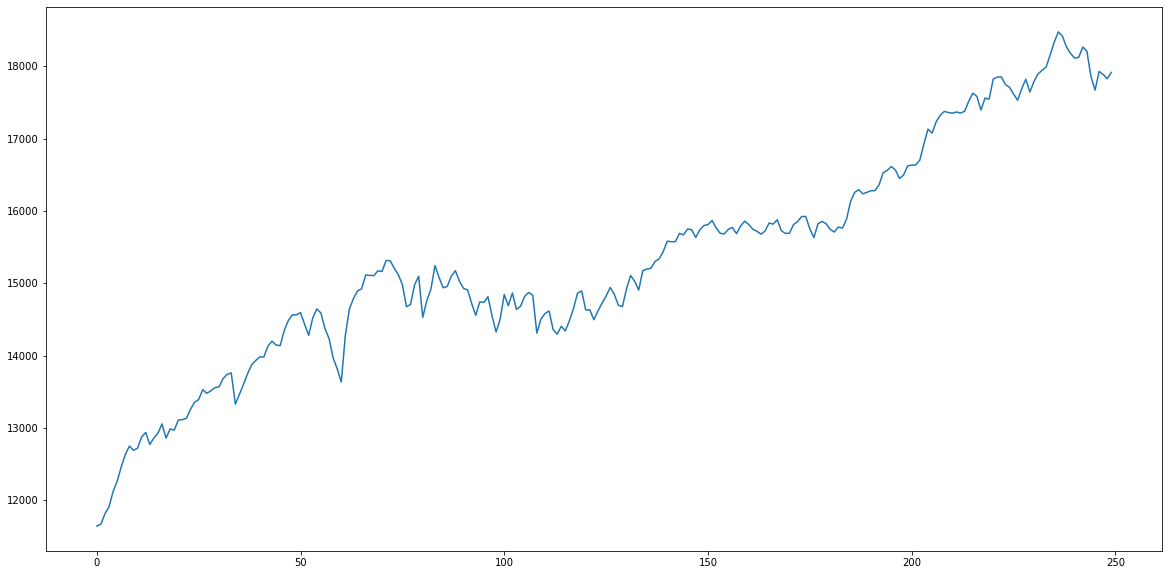

In [12]:
#Buy and hold Nifty
url = 'https://query2.finance.yahoo.com/v8/finance/chart/%5ENSEI?formatted=true&crumb=LqSYCwMewDq&lang=en-US&region=US&includeAdjustedClose=true&interval=1d&period1=1189987200&period2=1636243200&events=capitalGain|div|split&useYfid=true&corsDomain=finance.yahoo.com'
r = requests.get(url, headers=header)
soup = json.loads(str(BeautifulSoup(r.text, 'html.parser')))
closeList = soup['chart']['result'][0]['indicators']['quote'][0]['close'][-252:]
closeList = [i for i in closeList if i != None]
changeInPrice = [np.log(closeList[i+1]/closeList[i]) for i in range(len(closeList)-1)]
negReturns = [i for i in changeInPrice if i<0]
print({
        'meanReturn' : np.mean(changeInPrice),
        'medianReturn' : np.median(changeInPrice),
        'sharpe' : (np.mean(changeInPrice)/np.std(changeInPrice))*np.sqrt(252),
        'absSharpe' : (abs(np.mean(changeInPrice))/np.std(changeInPrice))*np.sqrt(252),
        'sortino' : (np.mean(changeInPrice)/np.std(negReturns))*np.sqrt(252),
        'absSortino' : (abs(np.mean(changeInPrice))/np.std(negReturns))*np.sqrt(252),
        'totalNoOfDays' : len(changeInPrice),
        'inyears' : len(changeInPrice)/252
    })
plt.plot(closeList)